In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np
from numpy import NaN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import missingno as msno
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.knn import KNN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.feature_selection import SequentialFeatureSelector
from pandas.plotting import table
from sklearn.manifold import Isomap

In [2]:
# Importing Dataset 

df = pd.read_csv("../Data Preparation Project/Weather_Data.csv")
df.head(10)


,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92.0,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83.0,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88.0,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,NaN,2.2,0.0,W,41,NNE,E,...,83.0,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88.0,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
5,2/6/2008,20.2,27.2,1.6,2.6,8.6,W,41,W,ENE,...,69.0,62,1002.7,998.6,6,6,23.8,26.0,Yes,Yes
6,2/7/2008,18.6,26.3,6.2,5.2,5.2,W,41,W,S,...,75.0,80,999.0,1000.3,4,7,21.7,22.3,Yes,Yes
7,2/8/2008,17.2,22.3,27.6,5.8,2.1,W,41,S,SE,...,77.0,61,1008.3,1007.4,7,8,18.9,21.1,Yes,Yes
8,2/9/2008,16.4,20.8,12.6,4.8,3.0,W,41,SSW,W,...,92.0,91,1006.4,1007.6,7,7,17.1,16.5,Yes,Yes
9,2/10/2008,14.6,24.2,8.8,4.4,10.1,W,41,W,SSE,...,80.0,53,1014.0,1013.4,4,2,17.2,23.3,Yes,No


# Step 1: Replace Null values with zero & Data selection

In [3]:
df1 = df.copy()

In [4]:
#Selecting features with numeric values for prediction and keeping the target variable - RainTomorrow
df1 = df1[["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am",
    "WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","RainTomorrow"]]

In [5]:
df1.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall         13
Evaporation       0
Sunshine          0
WindGustSpeed     0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am      14
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
RainTomorrow      0
dtype: int64

In [6]:
#Modify the original dataframe 
df1.fillna(0, inplace=True)

In [7]:
df1.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainTomorrow     0
dtype: int64

In [8]:
features = df1.drop(columns='RainTomorrow', axis=1)
Y = df1['RainTomorrow']

In [9]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(features , Y , test_size=0.2, random_state=10)
print("train set:", x_train1.shape, y_train1.shape)
print("test set:", x_test1.shape, y_train1.shape)

train set: (2624, 14) (2624,)
test set: (656, 14) (2624,)


In [10]:
df1.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainTomorrow     0
dtype: int64

In [11]:
LR1 = LogisticRegression(solver='liblinear').fit(x_train1, y_train1)

In [12]:
predictions1 = LR1.predict(x_test1)

In [13]:
LR_Accuracy_Score1 = metrics.accuracy_score(y_test1, predictions1)
print("LR Accuracy score is:", LR_Accuracy_Score1)
#LR_F1_Score1 = metrics.f1_score(y_test1, predictions1)
#print("LR F1 score is: ", LR_F1_Score1)

LR Accuracy score is: 0.8338414634146342


In [14]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score1]


Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.833841


# Step 2: One-Hot encoding for Nominal variables 

In [15]:
# WindDir3pm has some null values in it so we are going to add this column in next step to treat its data missingness
df2 = pd.concat([df1, df[['Date','WindGustDir','WindDir9am','RainToday']]], axis=1)

In [16]:
# Then, we need to perform one hot encoding to convert categorical variables to binary variables.
df_sydney_processed = pd.get_dummies(data=df2, columns=['RainToday', 'WindGustDir', 'WindDir9am'])

In [17]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [18]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [19]:
df_sydney_processed = df_sydney_processed.astype(float)

In [20]:
df_sydney_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.5,25.6,6.0,3.4,2.7,41.0,9.0,13.0,83.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,21.6,24.5,6.6,2.4,0.1,41.0,17.0,2.0,88.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.2,22.8,0.0,2.2,0.0,41.0,22.0,20.0,83.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.7,25.7,77.4,4.8,0.0,41.0,11.0,6.0,88.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

In [22]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features , Y , test_size=0.2, random_state=10)
print("train set:", x_train2.shape, y_train2.shape)
print("test set:", x_test2.shape, y_train2.shape)

train set: (2624, 48) (2624,)
test set: (656, 48) (2624,)


In [23]:
LR2 = LogisticRegression(solver='liblinear').fit(x_train2, y_train2)

In [24]:
predictions2 = LR2.predict(x_test2)

In [25]:
LR_Accuracy_Score2 = metrics.accuracy_score(y_test2, predictions2)
print("LR Accuracy score is:", LR_Accuracy_Score2)

LR Accuracy score is: 0.823170731707317


In [26]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score2]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.823171


# Step 3: Missing Data - Remove Null data instances 

In [27]:
df3 = df.copy()

In [28]:
df3.isnull().sum()

Date              0
MinTemp           0
MaxTemp           0
Rainfall         13
Evaporation       0
Sunshine          0
WindGustDir       0
WindGustSpeed     0
WindDir9am        0
WindDir3pm       32
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am      14
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           4
RainToday         0
RainTomorrow      0
dtype: int64

In [29]:
#Now for the missing data treatment we can also use the other method to delete the rows with missing values
#This method is not a good approach and it results in a poor model

df3_sydney_processed = df3.dropna(subset=["Rainfall","Temp3pm","WindDir3pm","Humidity9am"])


In [30]:
df3_sydney_processed.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [31]:
# Then, we need to perform one hot encoding to convert categorical variables to binary variables.
df3_sydney_processed = pd.get_dummies(data=df3_sydney_processed, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [32]:
df3_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [33]:
df3_sydney_processed.drop('Date',axis=1,inplace=True)

In [34]:
df3_sydney_processed = df3_sydney_processed.astype(float)

In [35]:
df3_sydney_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,19.5,25.6,6.0,3.4,2.7,41.0,9.0,13.0,83.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.6,24.5,6.6,2.4,0.1,41.0,17.0,2.0,88.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.7,25.7,77.4,4.8,0.0,41.0,11.0,6.0,88.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,20.2,27.2,1.6,2.6,8.6,41.0,9.0,22.0,69.0,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
features = df3_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df3_sydney_processed['RainTomorrow']

In [37]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(features , Y , test_size=0.2, random_state=10)
print("train set:", x_train3.shape, y_train3.shape)
print("test set:", x_test3.shape, y_train3.shape)

train set: (2573, 66) (2573,)
test set: (644, 66) (2573,)


In [38]:
LR3 = LogisticRegression(solver='liblinear').fit(x_train3, y_train3)

In [39]:
predictions3 = LR3.predict(x_test3)

In [40]:
LR_Accuracy_Score3 = metrics.accuracy_score(y_test3, predictions3)
print("LR Accuracy score is:", LR_Accuracy_Score3)

LR Accuracy score is: 0.8509316770186336


In [41]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score3]


Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.850932


# Step 4: Missing Data - Mean/Mode substitution

In [42]:
#Check database for missing values to find out which columns and rows have null values 
df4 = df.copy()
df4.isna().sum()

Date              0
MinTemp           0
MaxTemp           0
Rainfall         13
Evaporation       0
Sunshine          0
WindGustDir       0
WindGustSpeed     0
WindDir9am        0
WindDir3pm       32
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am      14
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           4
RainToday         0
RainTomorrow      0
dtype: int64

In [43]:
# Then we will check the exact rows and columns with null values 
np.where(pd.isnull(df4))

(array([   3,   12,   32,   35,   59,   82,  113,  138,  144,  163,  201,
         254,  289,  351,  370,  413,  438,  486,  524,  617,  618,  632,
         654,  739,  796,  847,  859,  975, 1056, 1149, 1295, 1329, 1340,
        1359, 1418, 1452, 1493, 1567, 1629, 1666, 1682, 1769, 1856, 1886,
        2006, 2185, 2197, 2238, 2278, 2314, 2316, 2364, 2383, 2420, 2491,
        2585, 2993, 3056, 3124, 3150, 3177, 3194, 3272]),
 array([ 3, 12, 12,  9, 12, 19,  3, 12,  9,  9,  9, 12,  9, 12,  9,  9, 19,
         9, 12,  3, 12, 12, 12,  9,  9, 12,  3,  9, 12,  9,  9,  9,  9,  9,
        12,  9,  9, 12,  9, 19,  9,  9,  3,  9,  9,  9,  3,  3,  3,  3,  9,
         3, 19,  3,  3,  9,  3,  9,  9,  9,  9,  9,  9]))

In [44]:
Null_values_Temp3pm = pd.isnull(df4["Temp3pm"])
df4[Null_values_Temp3pm]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
82,4/23/2008,14.7,17.9,12.6,4.0,0.7,W,41,SW,SSE,...,90.0,89,1024.0,1022.1,7,7,16.2,NaN,Yes,Yes
438,4/15/2009,16.1,29.3,0.2,5.0,10.0,W,41,W,NW,...,70.0,25,1011.1,1006.9,0,1,20.5,NaN,No,No
1666,11/13/2012,16.9,23.9,0.0,9.8,9.9,S,57,S,SSE,...,60.0,51,1020.3,1019.0,1,3,19.6,NaN,No,No
2383,1/5/2015,20.5,26.3,0.2,10.0,3.4,S,35,SSW,ESE,...,82.0,66,1019.4,1018.7,7,7,21.8,NaN,No,No


In [45]:
Null_values_Rainfall = pd.isnull(df4["Rainfall"])
df4[Null_values_Rainfall]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3,2/4/2008,20.2,22.8,NaN,2.2,0.0,W,41,NNE,E,...,83.0,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
113,5/24/2008,11.4,20.1,NaN,2.4,9.1,W,41,W,NW,...,71.0,39,1025.4,1022.7,1,1,13.3,19.3,No,No
617,10/10/2009,8.9,18.6,NaN,3.4,6.7,W,41,W,S,...,84.0,59,1029.7,1027.3,4,7,12.0,17.6,Yes,Yes
859,6/15/2010,8.1,19.3,NaN,2.0,9.3,W,41,W,ENE,...,86.0,56,1032.7,1028.9,5,4,10.0,17.6,No,No
1856,7/20/2013,14.5,20.4,NaN,2.4,8.9,NNW,48,N,NW,...,65.0,38,1009.3,1005.4,2,2,16.5,19.8,No,No
2197,6/25/2014,11.1,18.1,NaN,4.0,9.7,W,76,W,W,...,45.0,35,1012.2,1012.8,1,1,14.8,17.7,No,No
2238,8/5/2014,7.9,20.6,NaN,1.6,10.2,SSE,33,W,SSE,...,75.0,40,1032.0,1030.1,0,1,10.0,17.5,No,No
2278,9/14/2014,12.9,22.6,NaN,2.8,9.5,SSE,35,WNW,E,...,69.0,66,1020.6,1016.0,0,1,17.3,20.5,No,No
2314,10/22/2014,15.0,21.3,NaN,5.0,9.2,NNE,46,NNW,NE,...,54.0,54,1027.1,1022.0,7,1,17.8,20.4,No,No
2364,12/17/2014,19.2,23.8,NaN,7.6,5.8,W,41,SSE,SE,...,61.0,51,1006.3,1007.8,2,7,21.2,22.3,No,No


<Axes: >

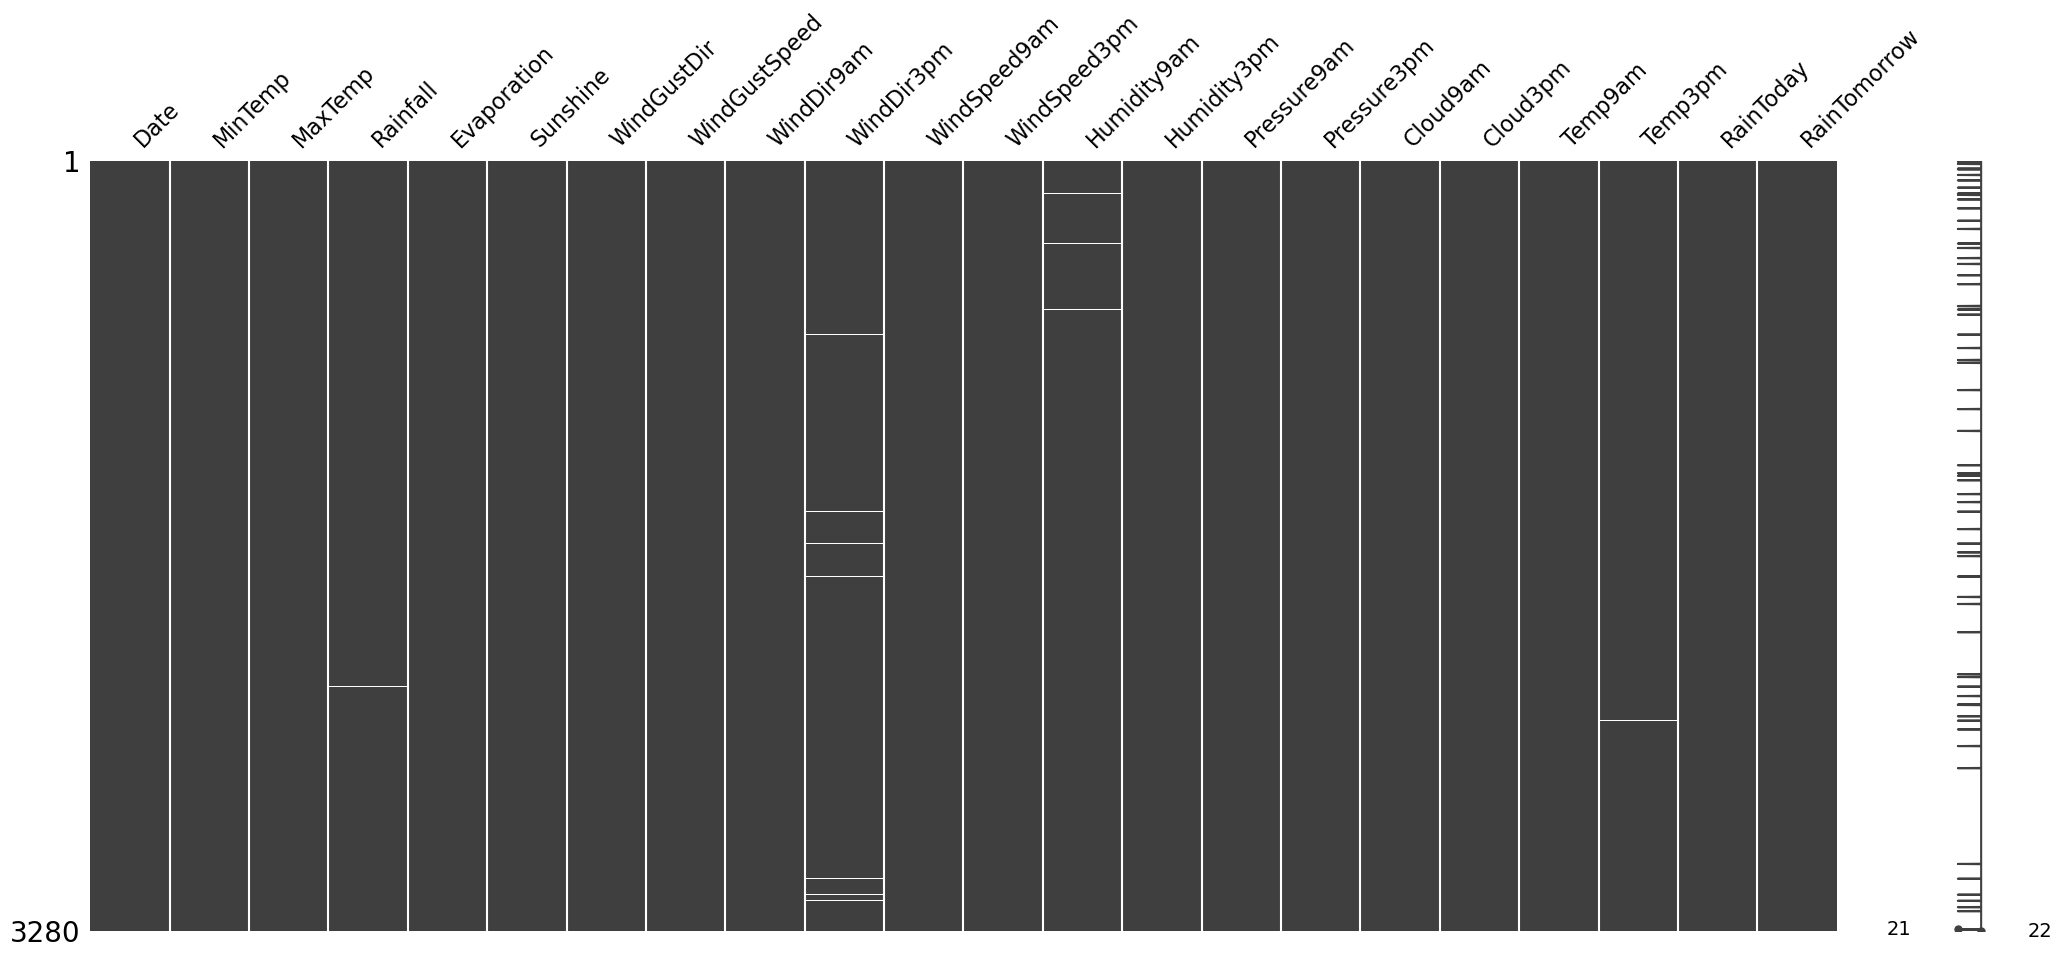

In [46]:
# We can also visualize the missingness distribution to improve our undrestanding of the dataset  

msno.matrix(df4)

In [47]:
# The Rainfall datatype is object but when we check the dataset we see that all its values are numeric so we can
# change its datatype from object to float in order to use mean substitution method for data missingness in Rainfall column
#Since there are few missingness we can use this method 
df4["Rainfall"] = pd.to_numeric(df4["Rainfall"], errors="coerce")

In [48]:
#After converting the columns datatype from object to float then we calculate the mean value
Rainfall_Mean = df4["Rainfall"].mean()
Rainfall_Mean_Round = "{:.1f}".format(Rainfall_Mean)
print(Rainfall_Mean_Round)

3.3


In [49]:
# We also compute the Mean for Temp3pm 
Temp3pm_Mean = df4["Temp3pm"].mean()
Temp3pm_Mean_Round = "{:.1f}".format(Temp3pm_Mean)
Humidity9am_Mean = df4["Humidity9am"].mean()
Humidity9am_Mean_Round = "{:.1f}".format(Humidity9am_Mean)
print(Temp3pm_Mean_Round)
print(Humidity9am_Mean_Round)

21.5
68.2


In [50]:
#For WindDir3pm because the values are nominal we use the mode instead of mean 
WindDir3pm_Mode = df4["WindDir3pm"].mode()

In [51]:
#Then we fill in the missing values Rainfall_Mean Temp3pm_Mean and E value 
df4["Rainfall"] = df4["Rainfall"].fillna(Rainfall_Mean_Round)
df4["Temp3pm"] = df4["Temp3pm"].fillna(Temp3pm_Mean_Round)
df4["Humidity9am"] = df4["Humidity9am"].fillna(Humidity9am_Mean_Round)
df4["WindDir3pm"] = df4["WindDir3pm"].fillna('E')

In [52]:
#We check the database to see if missingness in Rainfall column is treated 
df4.isna().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [53]:
# Then, we need to perform one hot encoding to convert categorical variables to binary variables.
df4_sydney_processed = pd.get_dummies(data=df4, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [54]:
# Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column.
df4_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [55]:
#Training Data and Test Data 

In [56]:
df4_sydney_processed.drop('Date',axis=1,inplace=True)

In [57]:
df4_sydney_processed = df4_sydney_processed.astype(float)

In [58]:
features = df4_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df4_sydney_processed['RainTomorrow']

In [59]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(features , Y , test_size=0.2, random_state=10)
print("train set:", x_train4.shape, y_train4.shape)
print("test set:", x_test4.shape, y_train4.shape)

train set: (2624, 66) (2624,)
test set: (656, 66) (2624,)


In [60]:
LR4 = LogisticRegression(solver='liblinear').fit(x_train4, y_train4)

In [61]:
predictions4 = LR4.predict(x_test4)

In [62]:
LR_Accuracy_Score4 = metrics.accuracy_score(y_test4, predictions4)
print("LR Accuracy score is:", LR_Accuracy_Score4)

LR Accuracy score is: 0.8307926829268293


In [63]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score4]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.830793


# Step 5: Missing Data - Imputation of missing values & Decoupling 

In [64]:
df5 = df.copy()
df5_Decouple_version = df.copy()

In [65]:
cols = ["Rainfall","Temp3pm","Humidity9am"]

In [66]:
imp = IterativeImputer(random_state=0)

In [67]:
df5[cols] = imp.fit_transform(df5[cols])

In [68]:
df5.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.600000,6.2,0.0,W,41,S,SSW,...,92.0,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.000000,3.4,2.7,W,41,W,E,...,83.0,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.600000,2.4,0.1,W,41,ESE,ESE,...,88.0,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,6.546605,2.2,0.0,W,41,NNE,E,...,83.0,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.400000,4.8,0.0,W,41,NNE,W,...,88.0,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [69]:
#Since MultivarientImputation method can not be used for WindDir3pm since the values are not numeric we use the mode 
#institution 
WindDir3pm_Mode = df5["WindDir3pm"].mode()
df["WindDir3pm"] = df5["WindDir3pm"].fillna('E')

In [70]:
#In this Dataset before building the model we drop the Date value because we don't need it in our target model
#However I used two various method for decoupling of the Date variable

In [71]:
# Method 1 for decoupling Date value first we convert it to string datatype then we extract year by using string method
df5_Decouple_version.dtypes
df5_Decouple_version.Date.str.slice(-4,).astype(int)

0       2008
1       2008
2       2008
3       2008
4       2008
        ... 
3275    2017
3276    2017
3277    2017
3278    2017
3279    2017
Name: Date, Length: 3280, dtype: int64

In [72]:
# Method 2 to decouple the Year by changing the datatype of Date to datetime by using pandas
df5_Decouple_version['Date'] = pd.to_datetime(df5.Date)
df5_Decouple_version.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92.0,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83.0,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88.0,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2008-02-04,20.2,22.8,NaN,2.2,0.0,W,41,NNE,E,...,83.0,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2008-02-05,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88.0,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [73]:
# By using method 2 we can benefit from a lot of functions which are available in datetime datatype like below 

df5_Decouple_version.Date.dt.month
df5_Decouple_version.Date.dt.dayofyear
df5_Decouple_version.Date.dt.weekday

0       4
1       5
2       6
3       0
4       1
       ..
3275    2
3276    3
3277    4
3278    5
3279    6
Name: Date, Length: 3280, dtype: int32

In [74]:
df5_sydney_processed = pd.get_dummies(data=df5, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [75]:
df5_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [76]:
df5_sydney_processed.drop('Date',axis=1,inplace=True)

In [77]:
df5_sydney_processed = df5_sydney_processed.astype(float)

In [78]:
features = df5_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df5_sydney_processed['RainTomorrow']

In [79]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(features , Y , test_size=0.2, random_state=10)

In [80]:
print("train set:", x_train5.shape, y_train5.shape)
print("test set:", x_test5.shape, y_train5.shape)

train set: (2624, 66) (2624,)
test set: (656, 66) (2624,)


In [81]:
LR5 = LogisticRegression(solver='liblinear').fit(x_train5, y_train5)

In [82]:
predictions5 = LR5.predict(x_test5)

In [83]:
LR_Accuracy_Score5 = metrics.accuracy_score(y_test5, predictions5)
print("LR Accuracy score is:", LR_Accuracy_Score5)

LR Accuracy score is: 0.8323170731707317


In [84]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score5]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.832317


# Step 6: Missing Data - KNN Imputation & Simple Imputation

In [85]:
df6 = df.copy()

In [86]:
imputer = KNNImputer(n_neighbors=8, weights='distance')

In [87]:
cols = ["Rainfall","Temp3pm"]
col=["Humidity9am"]

In [88]:
imputed_data = imputer.fit_transform(df6[cols])

In [89]:
imputed_data = pd.DataFrame(imputed_data, columns=cols)
df6[cols] = imputed_data

In [90]:
imputer_Humidity9am = SimpleImputer(strategy='most_frequent')

In [91]:
imputed_data_Humidity9am = imputer_Humidity9am.fit_transform(df6[col])

In [92]:
imputed_data_Humidity9am = pd.DataFrame(imputed_data_Humidity9am, columns=col)
df6[col] = imputed_data_Humidity9am

In [93]:
WindDir3pm_Mode = df6["WindDir3pm"].mode()
df6["WindDir3pm"] = df6["WindDir3pm"].fillna('E')

In [94]:
df6.isna().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [95]:
df6_sydney_processed = pd.get_dummies(data=df6, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [96]:
df6_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [97]:
df6_sydney_processed.drop('Date',axis=1,inplace=True)

In [98]:
features = df6_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df6_sydney_processed['RainTomorrow']

In [99]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(features , Y , test_size=0.2, random_state=10)

In [100]:
print("train set:", x_train6.shape, y_train6.shape)
print("test set:", x_test6.shape, y_train6.shape)

train set: (2624, 66) (2624,)
test set: (656, 66) (2624,)


In [101]:
LR6 = LogisticRegression(solver='liblinear').fit(x_train6, y_train6)

In [102]:
predictions6 = LR6.predict(x_test6)

In [103]:
LR_Accuracy_Score6 = metrics.accuracy_score(y_test6, predictions6)
print("LR Accuracy score is:", LR_Accuracy_Score6)

LR Accuracy score is: 0.8338414634146342


In [104]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score6]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.833841


# Step 7: Missing Data - Backward and Forward Fill Method

In [105]:
df7 = df.copy()

In [106]:
# Use the bfill method to fill the missing values by using the previous data point
#df7.bfill(axis=0, inplace=True)
df7_sydney_processed = df7.ffill().bfill()

In [107]:
df7_sydney_processed = pd.get_dummies(data=df7_sydney_processed, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [108]:
df7_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [109]:
df7_sydney_processed.drop('Date',axis=1,inplace=True)

In [110]:
features = df7_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df7_sydney_processed['RainTomorrow']

In [111]:
x_train7, x_test7, y_train7, y_test7 = train_test_split(features , Y , test_size=0.2, random_state=10)

In [112]:
print("train set:", x_train7.shape, y_train7.shape)
print("test set:", x_test7.shape, y_train7.shape)

train set: (2624, 66) (2624,)
test set: (656, 66) (2624,)


In [113]:
LR7 = LogisticRegression(solver='liblinear').fit(x_train7, y_train7)

In [114]:
predictions7 = LR7.predict(x_test7)

In [115]:
LR_Accuracy_Score7 = metrics.accuracy_score(y_test7, predictions7)
print("LR Accuracy score is:", LR_Accuracy_Score7)

LR Accuracy score is: 0.8292682926829268


In [116]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score7]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.829268


# Step 8: Find and remove duplicate values 

In [117]:
#Among the missingness treatments step 3 had the best result thus we choose that one and continue 
df8_sydney_processed = df3_sydney_processed.copy()
df8_sydney_processed.duplicated().sum()

9

In [118]:
# We check for duplicates in the dataframe 
df8_sydney_processed[df8_sydney_processed.duplicated()].head(9)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
96,13.0,23.0,0.0,3.6,9.4,41.0,22.0,13.0,57.0,44.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
394,20.5,25.7,0.0,6.8,10.0,41.0,9.0,19.0,70.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,13.7,18.5,8.0,2.8,0.1,41.0,6.0,19.0,89.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,14.3,24.0,0.0,5.8,11.4,43.0,15.0,26.0,64.0,46.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1574,6.5,17.4,0.0,4.2,9.6,44.0,26.0,9.0,58.0,37.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2149,11.1,21.0,0.0,5.8,6.2,46.0,19.0,19.0,66.0,65.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2794,21.8,29.7,0.0,9.4,12.4,43.0,9.0,22.0,62.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3081,18.1,27.8,0.4,13.6,13.4,72.0,44.0,31.0,35.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3269,10.7,20.1,0.6,1.2,6.4,22.0,13.0,15.0,89.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
#Since these values have been repeated and it will impact our model we remove these rows 
df8_sydney_processed.drop_duplicates(inplace = True)

# We can also check for duplicate values in a specific column 
#df6_sydney_processed.duplicated("Rainfall").sum()

In [120]:
df8_sydney_processed.duplicated().sum()

0

In [121]:
features = df8_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df8_sydney_processed['RainTomorrow']

In [122]:
x_train8, x_test8, y_train8, y_test8 = train_test_split(features , Y , test_size=0.2, random_state=10)

In [123]:
print("train set:", x_train8.shape, y_train8.shape)
print("test set:", x_test8.shape, y_train8.shape)

train set: (2566, 66) (2566,)
test set: (642, 66) (2566,)


In [124]:
LR8 = LogisticRegression(solver='liblinear').fit(x_train8, y_train8)

In [125]:
predictions8 = LR8.predict(x_test8)

In [126]:
LR_Accuracy_Score8 = metrics.accuracy_score(y_test8, predictions8)
print("LR Accuracy score is:", LR_Accuracy_Score8)

LR Accuracy score is: 0.8473520249221184


In [127]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score8]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.847352


# Step 9: Detecting outliers and removing them

In [128]:
df9_sydney_processed = df3_sydney_processed.copy()

In [129]:
df9_sydney_processed['WindGustSpeed'].describe()

count    3217.000000
mean       41.447933
std        10.839075
min        17.000000
25%        35.000000
50%        41.000000
75%        44.000000
max        96.000000
Name: WindGustSpeed, dtype: float64

In [130]:
df9_sydney_processed['Humidity9am'].describe()

count    3217.000000
mean       68.184022
std        15.083980
min        19.000000
25%        58.000000
50%        69.000000
75%        80.000000
max       100.000000
Name: Humidity9am, dtype: float64

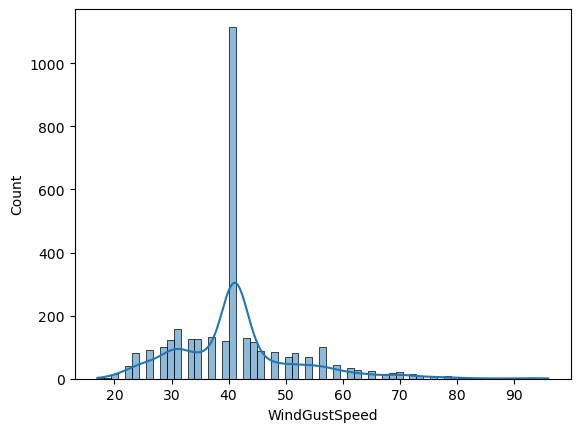

In [131]:
# Outlier visualization
sns.histplot(df9_sydney_processed['WindGustSpeed'], kde=True)
plt.show()

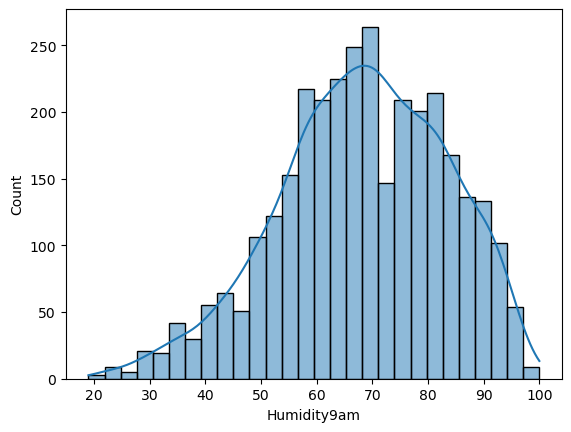

In [132]:
# Outlier visualization
sns.histplot(df9_sydney_processed['Humidity9am'], kde=True)
plt.show()

<Axes: >

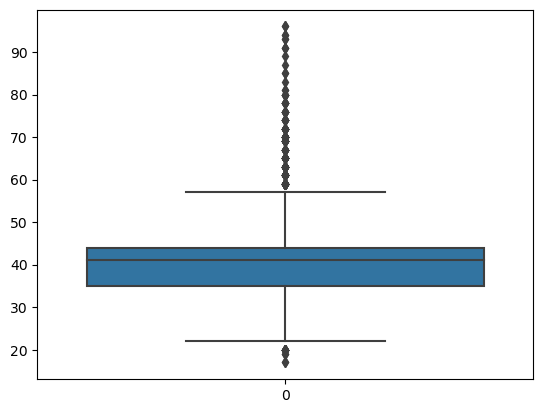

In [133]:
#Outlier visualization 
sns.boxplot(df9_sydney_processed["WindGustSpeed"])

<Axes: >

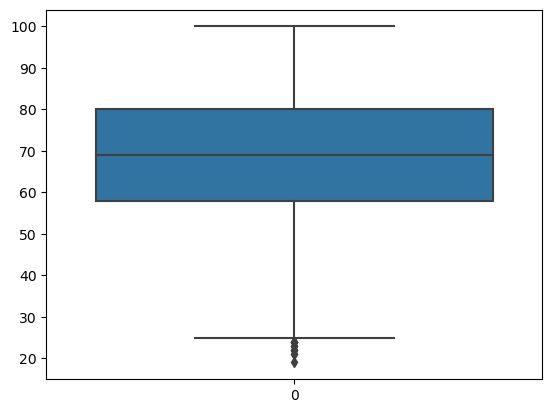

In [134]:
#Outlier visualization 
sns.boxplot(df9_sydney_processed["Humidity9am"])

In [135]:
#Detection of outlier using IQR
Q1 = df9_sydney_processed['WindGustSpeed'].quantile(0.25)
Q3 = df9_sydney_processed['WindGustSpeed'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [136]:
print(IQR)
print(lower)
print(upper)

9.0
21.5
57.5


In [137]:
df9_sydney_processed[(df9_sydney_processed.WindGustSpeed<=lower) | (df9_sydney_processed.WindGustSpeed>=upper)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
961,19.5,24.7,0.0,7.8,0.2,76.0,13.0,31.0,66.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
962,11.7,16.1,0.8,3.4,9.3,85.0,46.0,48.0,34.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
982,16.1,26.3,0.0,5.8,7.9,74.0,7.0,28.0,64.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
991,16.7,20.0,0.0,8.0,0.4,67.0,26.0,33.0,71.0,58.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
996,18.2,25.8,0.0,6.0,10.8,63.0,6.0,28.0,77.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,22.5,26.0,2.4,7.4,0.0,69.0,19.0,28.0,70.0,88.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3202,15.5,28.7,0.0,7.0,9.6,67.0,7.0,20.0,62.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3215,17.7,24.1,0.0,4.2,3.5,19.0,2.0,15.0,68.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3259,9.1,17.9,0.0,2.2,7.2,59.0,19.0,15.0,58.0,43.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
df9_sydney_processed["WindGustSpeed"] = np.clip(df9_sydney_processed["WindGustSpeed"], lower, upper)

<Axes: >

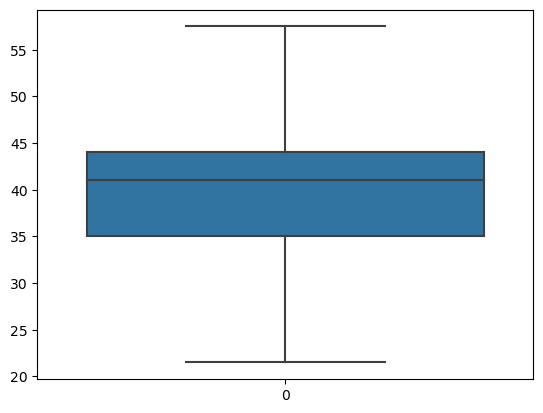

In [139]:
#visualization of Result
sns.boxplot(df9_sydney_processed["WindGustSpeed"])

In [140]:
#Detection of outlier using IQR
Q1 = df9_sydney_processed['Humidity9am'].quantile(0.25)
Q3 = df9_sydney_processed['Humidity9am'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [141]:
print(IQR)
print(lower)
print(upper)

22.0
25.0
113.0


In [142]:
df9_sydney_processed[(df9_sydney_processed.Humidity9am<=lower) | (df9_sydney_processed.Humidity9am>=upper)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
590,17.3,32.2,0.0,8.2,10.9,41.0,20.0,13.0,24.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,17.1,19.6,0.0,11.2,9.0,41.0,15.0,33.0,24.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
608,14.9,33.1,0.0,7.0,10.8,41.0,15.0,19.0,21.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,16.4,21.7,0.0,10.8,8.7,57.5,20.0,39.0,22.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1628,20.0,34.2,0.0,10.8,10.3,57.0,22.0,28.0,22.0,59.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1908,20.1,31.6,0.0,7.4,9.7,57.5,33.0,31.0,24.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1938,17.6,37.3,0.0,10.0,10.0,57.5,15.0,22.0,22.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1945,19.6,33.6,0.0,11.2,5.2,57.5,31.0,43.0,23.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2293,15.6,22.1,0.0,12.0,11.3,57.5,28.0,24.0,19.0,28.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3042,16.1,23.3,1.6,6.6,12.9,52.0,28.0,20.0,24.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
df9_sydney_processed["Humidity9am"] = np.clip(df9_sydney_processed["Humidity9am"], lower, upper)

<Axes: >

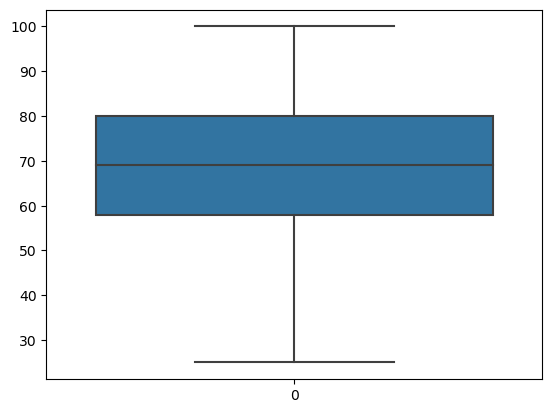

In [144]:
#visualization of Result
sns.boxplot(df9_sydney_processed["Humidity9am"])

In [145]:
features = df9_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df9_sydney_processed['RainTomorrow']

In [146]:
x_train9, x_test9, y_train9, y_test9 = train_test_split(features , Y , test_size=0.2, random_state=10)

In [147]:
print("train set:", x_train9.shape, y_train9.shape)
print("test set:", x_test9.shape, y_train9.shape)

train set: (2573, 66) (2573,)
test set: (644, 66) (2573,)


In [148]:
LR9 = LogisticRegression(solver='liblinear').fit(x_train9, y_train9)

In [149]:
predictions9 = LR9.predict(x_test9)

In [150]:
LR_Accuracy_Score9 = metrics.accuracy_score(y_test9, predictions9)
print("LR Accuracy score is:", LR_Accuracy_Score9)

LR Accuracy score is: 0.8509316770186336


In [151]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score9]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.850932


 # Step 10: Detecting outliers and Quantile Based Flooring and Capping 

In [152]:
df10_sydney_processed = df3_sydney_processed.copy()

In [153]:
lower = 0.10
upper = 0.90

# Loop over the columns
for col in ['WindGustSpeed', 'Humidity9am']:
  # Get the percentiles of the column
  percentiles = df10_sydney_processed[col].quantile([lower, upper]).values
  # Replace the outliers with the percentiles
  df[col] = np.clip(df10_sydney_processed[col], percentiles[0], percentiles[1])
  print("Lower:",percentiles[0])
  print("Upper:",percentiles[1])

Lower: 28.0
Upper: 56.0
Lower: 48.0
Upper: 88.0


In [154]:
features = df10_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df10_sydney_processed['RainTomorrow']

In [155]:
x_train10, x_test10, y_train10, y_test10 = train_test_split(features , Y , test_size=0.2, random_state=10)

In [156]:
print("train set:", x_train10.shape, y_train10.shape)
print("test set:", x_test10.shape, y_train10.shape)

train set: (2573, 66) (2573,)
test set: (644, 66) (2573,)


In [157]:
LR10 = LogisticRegression(solver='liblinear').fit(x_train10, y_train10)

In [158]:
predictions10 = LR10.predict(x_test10)

In [159]:
LR_Accuracy_Score10 = metrics.accuracy_score(y_test10, predictions10)
print("LR Accuracy score is:", LR_Accuracy_Score10)

LR Accuracy score is: 0.8509316770186336


In [160]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score10]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.850932


# Step 11: Detecting outliers by KNN(distance) and using Median Imputation 

In [161]:
df11_sydney_processed = df3_sydney_processed.copy()

<Axes: >

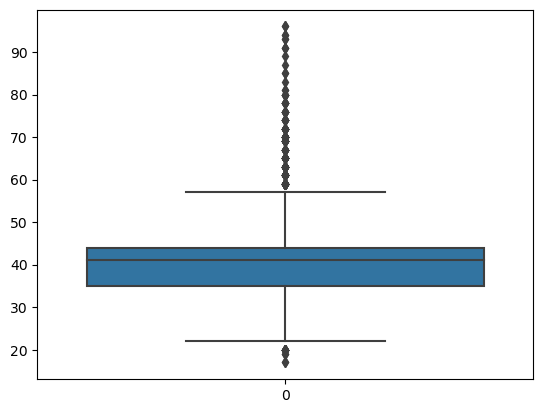

In [162]:
sns.boxplot(df11_sydney_processed["WindGustSpeed"])

<Axes: >

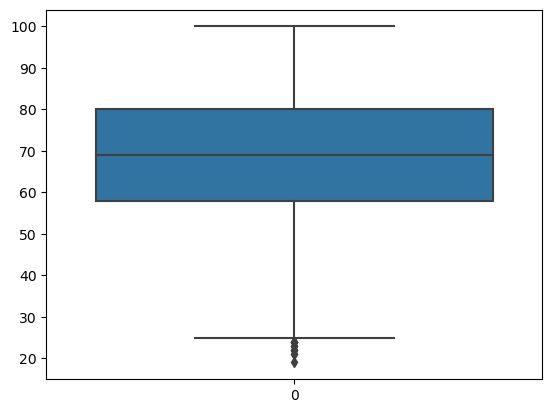

In [163]:
sns.boxplot(df11_sydney_processed["Humidity9am"])

In [164]:
threshold = 14 

In [165]:
#Create and fit the KNN model 
knn = KNN()
knn.fit(df11_sydney_processed)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [166]:
# Create a new object with the same parameters as the knn object
nn = NearestNeighbors(n_neighbors=knn.n_neighbors, algorithm=knn.algorithm, metric=knn.metric)

# Fit the new object with the data
nn.fit(df11_sydney_processed)

# Get the distances and indices of the k nearest neighbors
distances, indices = nn.kneighbors(df11_sydney_processed)

In [167]:
#Find the outliers based on the threshold 
outliers = np.where(distances.mean(axis=1) > threshold)[0]

In [168]:
print("Number of outliers:",len(outliers))
print("Outlier Indices:",outliers)

Number of outliers: 284
Outlier Indices: [   3   50  118  142  158  160  168  169  172  193  206  213  215  228
  233  260  279  281  282  302  303  343  356  387  409  421  457  486
  500  580  581  584  592  599  611  694  709  715  716  790  807  814
  815  823  874  886  914  918  934  935  940  948  959  985  988  989
  995 1033 1035 1036 1078 1079 1080 1081 1114 1119 1131 1133 1134 1136
 1156 1164 1168 1169 1170 1171 1172 1199 1200 1225 1229 1234 1236 1237
 1240 1261 1270 1271 1296 1299 1307 1309 1337 1343 1361 1364 1387 1394
 1395 1426 1433 1434 1435 1439 1467 1469 1478 1479 1480 1481 1486 1487
 1489 1497 1544 1547 1553 1554 1563 1564 1565 1569 1584 1590 1594 1595
 1603 1605 1635 1650 1651 1660 1670 1671 1708 1709 1724 1756 1757 1766
 1767 1787 1790 1793 1832 1836 1864 1866 1870 1871 1878 1882 1885 1894
 1897 1901 1907 1912 1913 1918 1919 1923 1931 1933 1937 1940 1950 1954
 1955 1967 1973 1977 2022 2026 2049 2098 2153 2164 2174 2202 2203 2204
 2219 2248 2257 2258 2263 2268 2284 

In [169]:
for i in outliers:
    df11_sydney_processed.loc[i, 'WindGustSpeed'] = df11_sydney_processed['WindGustSpeed'].mean()
    df11_sydney_processed.loc[i, 'Humidity9am'] = df11_sydney_processed['Humidity9am'].mean()

<Axes: >

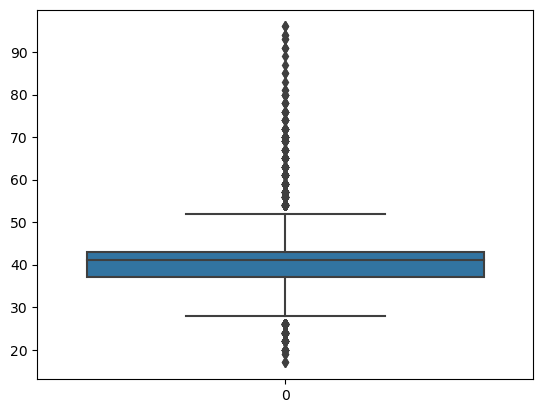

In [170]:
#visualization of Result
sns.boxplot(df11_sydney_processed["WindGustSpeed"])

<Axes: >

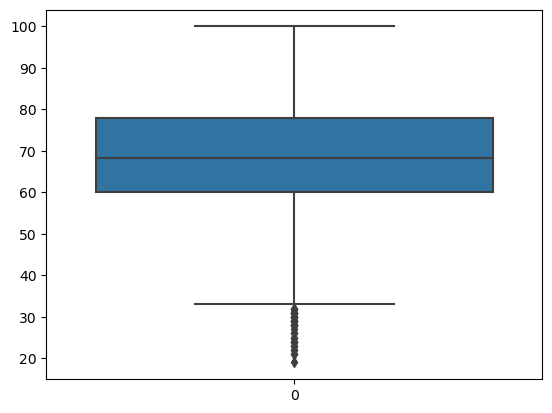

In [171]:
#visualization of Result
sns.boxplot(df11_sydney_processed["Humidity9am"])

In [172]:
#To check if the KNN detection and mean imputation creates a null value so we treat that missing data instance 
df11_sydney_processed.isnull().sum()

MinTemp           3
MaxTemp           3
Rainfall          3
Evaporation       3
Sunshine          3
                 ..
WindDir3pm_SSW    3
WindDir3pm_SW     3
WindDir3pm_W      3
WindDir3pm_WNW    3
WindDir3pm_WSW    3
Length: 67, dtype: int64

In [173]:
df11_sydney_processed = df11_sydney_processed.dropna()

In [174]:
features = df11_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df11_sydney_processed['RainTomorrow']

In [175]:
x_train11, x_test11, y_train11, y_test11 = train_test_split(features , Y , test_size=0.2, random_state=10)

In [176]:
print("train set:", x_train11.shape, y_train11.shape)
print("test set:", x_test11.shape, y_train11.shape)

train set: (2573, 66) (2573,)
test set: (644, 66) (2573,)


In [177]:
LR11 = LogisticRegression(solver='liblinear').fit(x_train11, y_train11)
predictions11 = LR11.predict(x_test11)

In [178]:
LR_Accuracy_Score11 = metrics.accuracy_score(y_test11, predictions11)
print("LR Accuracy score is:", LR_Accuracy_Score11)

LR Accuracy score is: 0.8493788819875776


In [179]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score11]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.849379


# Step 12: Detecting outliers by KNN(score) and using Median Imputation 

In [180]:
df12_sydney_processed = df3_sydney_processed.copy()

In [181]:
threshold = 21

In [182]:
# Create and fit the KNN model
knn = KNN()
knn.fit(df12_sydney_processed)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [183]:
# Get the outlier scores and labels
scores = knn.decision_scores_
labels = knn.labels_

In [184]:
# Find the outliers based on the threshold
outliers = np.where(scores > threshold)[0]

In [185]:
# Print the number and indices of the outliers
print(f"Number of outliers: {len(outliers)}")
print(f"Outlier indices: {outliers}")

Number of outliers: 196
Outlier indices: [   3   50  142  158  160  169  206  215  279  281  282  302  303  321
  343  409  421  457  500  584  589  592  611  635  694  709  715  807
  814  823  874  914  934  935  940  948  985  989  995 1035 1036 1078
 1080 1114 1119 1134 1136 1156 1169 1171 1172 1199 1200 1225 1229 1234
 1237 1240 1270 1296 1343 1361 1387 1394 1395 1434 1435 1439 1467 1469
 1480 1481 1486 1487 1544 1553 1564 1569 1590 1595 1605 1650 1651 1660
 1669 1670 1671 1708 1724 1757 1766 1767 1787 1788 1793 1836 1864 1866
 1870 1871 1878 1882 1885 1894 1897 1901 1907 1912 1913 1918 1919 1937
 1950 1973 2021 2022 2049 2098 2153 2164 2202 2203 2204 2244 2248 2258
 2263 2268 2284 2286 2291 2305 2321 2353 2384 2434 2435 2436 2465 2493
 2506 2515 2517 2521 2559 2588 2590 2599 2600 2602 2646 2651 2665 2670
 2691 2705 2712 2713 2714 2765 2779 2840 2841 2842 2856 2877 2887 2898
 2919 2928 2953 2957 2971 2990 2993 2998 3022 3023 3028 3030 3031 3043
 3063 3065 3068 3075 3083 3087 3105 

In [186]:
# Replace the outliers with the median value of the column
for i in outliers:
    df12_sydney_processed.loc[i, 'WindGustSpeed'] = df12_sydney_processed['WindGustSpeed'].median()
    df12_sydney_processed.loc[i, 'Humidity9am'] = df12_sydney_processed['Humidity9am'].median()

<Axes: >

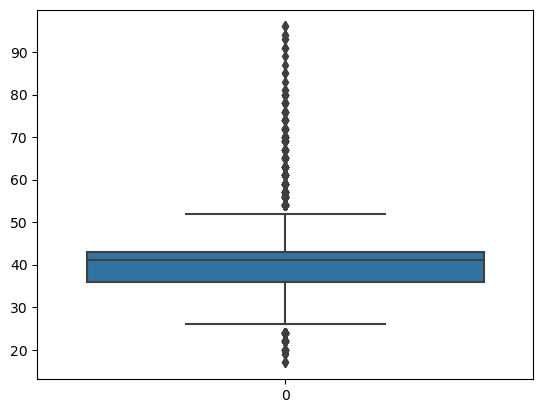

In [187]:
#visualization of Result
sns.boxplot(df12_sydney_processed["WindGustSpeed"])

<Axes: >

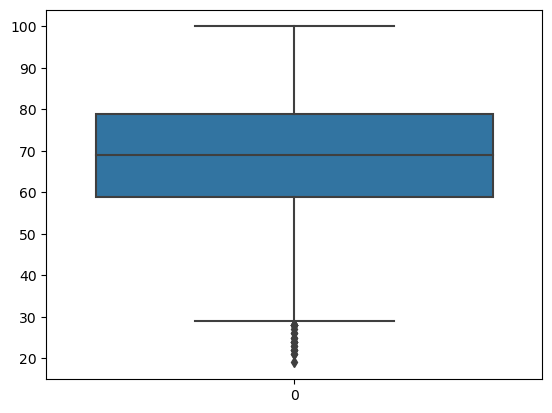

In [188]:
#visualization of Result
sns.boxplot(df12_sydney_processed["Humidity9am"])

In [189]:
#To check if the KNN detection creates a null value so we treat that missing data instance 
df12_sydney_processed.isnull().sum()

MinTemp           2
MaxTemp           2
Rainfall          2
Evaporation       2
Sunshine          2
                 ..
WindDir3pm_SSW    2
WindDir3pm_SW     2
WindDir3pm_W      2
WindDir3pm_WNW    2
WindDir3pm_WSW    2
Length: 67, dtype: int64

In [190]:
df12_sydney_processed = df12_sydney_processed.dropna()

In [191]:
features = df12_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df12_sydney_processed['RainTomorrow']

In [192]:
x_train12, x_test12, y_train12, y_test12 = train_test_split(features , Y , test_size=0.2, random_state=10)

In [193]:
print("train set:", x_train12.shape, y_train12.shape)
print("test set:", x_test12.shape, y_train12.shape)

train set: (2573, 66) (2573,)
test set: (644, 66) (2573,)


In [194]:
LR12 = LogisticRegression(solver='liblinear').fit(x_train12, y_train12)
predictions12 = LR12.predict(x_test12)

In [195]:
LR_Accuracy_Score12 = metrics.accuracy_score(y_test12, predictions12)
print("LR Accuracy score is:", LR_Accuracy_Score12)

LR Accuracy score is: 0.8509316770186336


In [196]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score12]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.850932


# Step 13: Discretization by Binning method - Interval Based 

In [197]:
# Step 9,10, and 12 had the same accuracy result for the outliers detection and treatment so we continue with one
#of these datasets 
df13_sydney_processed = df10_sydney_processed.copy()

In [198]:
#Define the number of bins
n_bins = 5

In [199]:
# Create the bins using Interval-based method for Pressure9am

df13_sydney_processed["Pressure9am"] = pd.cut(df13_sydney_processed["Pressure9am"], bins=n_bins, labels=False)

In [200]:
# Create the bins using Interval-based method for Pressure9am

df13_sydney_processed["Pressure3pm"] = pd.cut(df13_sydney_processed["Pressure3pm"], bins=n_bins, labels=False)

In [201]:
features = df13_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df13_sydney_processed['RainTomorrow']

In [202]:
df13_sydney_processed[["Pressure9am", "Pressure3pm"]]

,Pressure9am,Pressure3pm
0,2,2
1,2,2
2,2,2
4,2,1
5,1,0
...,...,...
3275,3,3
3276,3,3
3277,3,2
3278,2,2


In [203]:
x_train13, x_test13, y_train13, y_test13 = train_test_split(features , Y , test_size=0.2, random_state=10)

In [204]:
print("train set:", x_train13.shape, y_train13.shape)
print("test set:", x_test13.shape, y_train13.shape)

train set: (2573, 66) (2573,)
test set: (644, 66) (2573,)


In [205]:
LR13 = LogisticRegression(solver='liblinear').fit(x_train13, y_train13)
predictions13 = LR13.predict(x_test13)

In [206]:
LR_Accuracy_Score13 = metrics.accuracy_score(y_test13, predictions13)
print("LR Accuracy score is:", LR_Accuracy_Score13)

LR Accuracy score is: 0.8571428571428571


In [207]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score13]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.857143


# Step 14: Discretization by Binning method - Threshold Based 

In [208]:
df14_sydney_processed = df10_sydney_processed.copy()

In [209]:
# Define the threshold
threshold = 1000

In [210]:
# Create the bins using discretization binning by threshold method for column Pressure9am
# Use numpy.where to assign 0 or 1 based on the threshold
df14_sydney_processed["Pressure9am"] = np.where(df14_sydney_processed["Pressure9am"] > threshold, 0, 1)

In [211]:
df14_sydney_processed["Pressure3pm"] = np.where(df14_sydney_processed["Pressure3pm"] > threshold, 0, 1)

In [212]:
df14_sydney_processed[["Pressure9am", "Pressure3pm"]]

,Pressure9am,Pressure3pm
0,0,0
1,0,0
2,0,0
4,0,0
5,0,1
...,...,...
3275,0,0
3276,0,0
3277,0,0
3278,0,0


In [213]:
features = df14_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df14_sydney_processed['RainTomorrow']

In [214]:
x_train14, x_test14, y_train14, y_test14 = train_test_split(features , Y , test_size=0.2, random_state=10)

In [215]:
print("train set:", x_train14.shape, y_train14.shape)
print("test set:", x_test14.shape, y_train14.shape)

train set: (2573, 66) (2573,)
test set: (644, 66) (2573,)


In [216]:
LR14 = LogisticRegression(solver='liblinear').fit(x_train14, y_train14)
predictions14 = LR14.predict(x_test14)

In [217]:
LR_Accuracy_Score14 = metrics.accuracy_score(y_test14, predictions14)
print("LR Accuracy score is:", LR_Accuracy_Score14)

LR Accuracy score is: 0.8462732919254659


In [218]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score14]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.846273


# Step 15: Discretization by Clustering

In [219]:
df15_sydney_processed = df10_sydney_processed.copy()

In [220]:
# Define the number of bins
n_bins = 5

In [221]:
# Create the bins using clustering discretization method for column A

kb = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="kmeans", subsample=None)
kb.fit(df15_sydney_processed[["Pressure9am"]])
df15_sydney_processed["Pressure9am"] = kb.transform(df15_sydney_processed[["Pressure9am"]])

In [222]:
# Create the bins using clustering discretization method for column A

kb = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="kmeans", subsample=None)
kb.fit(df15_sydney_processed[["Pressure3pm"]])
df15_sydney_processed["Pressure3pm"] = kb.transform(df15_sydney_processed[["Pressure3pm"]])

In [223]:
df15_sydney_processed[['Pressure9am','Pressure3pm']]

,Pressure9am,Pressure3pm
0,2.0,2.0
1,2.0,2.0
2,2.0,2.0
4,0.0,0.0
5,0.0,0.0
...,...,...
3275,3.0,4.0
3276,4.0,4.0
3277,3.0,2.0
3278,2.0,2.0


In [224]:
features = df15_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df15_sydney_processed['RainTomorrow']

In [225]:
x_train15, x_test15, y_train15, y_test15 = train_test_split(features , Y , test_size=0.2, random_state=10)

In [226]:
print("train set:", x_train15.shape, y_train15.shape)
print("test set:", x_test15.shape, y_train15.shape)

train set: (2573, 66) (2573,)
test set: (644, 66) (2573,)


In [227]:
LR15 = LogisticRegression(solver='liblinear').fit(x_train15, y_train15)
predictions15 = LR15.predict(x_test15)

In [228]:
LR_Accuracy_Score15 = metrics.accuracy_score(y_test15, predictions15)
print("LR Accuracy score is:", LR_Accuracy_Score15)

LR Accuracy score is: 0.8540372670807453


In [229]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score15]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.854037


# Step 16: Power Transfomation using Box-cox method

In [230]:
# Step 13 and 15 had the same accuracy result for the binning so we continue with one of these datasets 
df16_sydney_processed = df13_sydney_processed.copy()

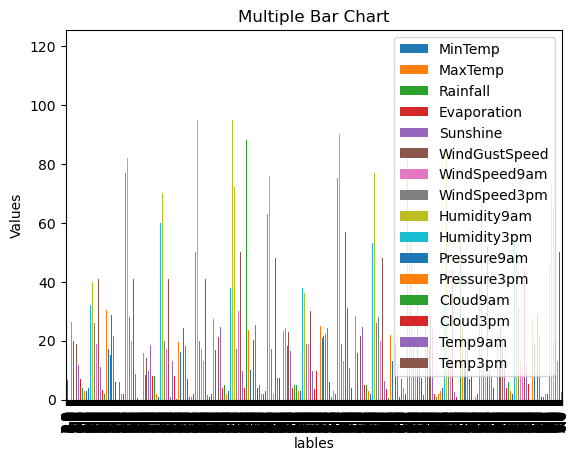

In [231]:
ax = df16_sydney_processed.plot.bar(x="RainTomorrow" , y=["MinTemp", "MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am",
    "WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm"] , title="Multiple Bar Chart")
ax.set_xlabel("lables")
ax.set_ylabel("Values")
ax.legend(loc="upper right")

In [232]:
plt.show()

In [233]:
pt = PowerTransformer(method='box-cox')

In [234]:
#Fit the Power Transformation object to the columns 
pt.fit(df16_sydney_processed[["MinTemp","MaxTemp","Humidity9am","Humidity3pm","Temp9am","Temp3pm"]])

PowerTransformer(method='box-cox')

In [235]:
df16_sydney_processed_transformed = pd.DataFrame(pt.transform(df16_sydney_processed[["MinTemp","MaxTemp","Humidity9am","Humidity3pm","Temp9am","Temp3pm"]]), columns=["MinTemp","MaxTemp","Humidity9am","Humidity3pm","Temp9am","Temp3pm"])

In [236]:
df16_sydney_processed_transformed.head()

,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Temp9am,Temp3pm
0,1.011383,-0.053399,1.690649,1.798984,0.597804,-0.077441
1,1.011383,0.636647,1.000136,1.125519,0.934618,0.792570
2,1.445416,0.408218,1.379432,1.921325,1.150820,0.404449
3,1.053029,0.656995,1.379432,1.186786,0.954328,0.937960
4,1.156852,0.954353,-0.001618,0.450949,1.209560,1.040038


In [237]:
df16_sydney_processed_transformed2 = pd.concat([df16_sydney_processed_transformed, df[["Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am",
    "WindSpeed3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","RainTomorrow"]]], axis=1)

In [238]:
df16_sydney_processed_transformed2.head()

,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Temp9am,Temp3pm,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainTomorrow
0,1.011383,-0.053399,1.690649,1.798984,0.597804,-0.077441,15.6,6.2,0.0,41.0,17,20,1017.6,1017.4,8,8,Yes
1,1.011383,0.636647,1.000136,1.125519,0.934618,0.792570,6.0,3.4,2.7,41.0,9,13,1017.9,1016.4,7,7,Yes
2,1.445416,0.408218,1.379432,1.921325,1.150820,0.404449,6.6,2.4,0.1,41.0,17,2,1016.7,1015.6,7,8,Yes
3,1.053029,0.656995,1.379432,1.186786,0.954328,0.937960,NaN,2.2,0.0,NaN,22,20,1014.2,1011.8,8,8,Yes
4,1.156852,0.954353,-0.001618,0.450949,1.209560,1.040038,77.4,4.8,0.0,41.0,11,6,1008.3,1004.8,8,8,Yes


In [239]:
#To check if the power transformation creates a null value so we treat that missing data instance 
df16_sydney_processed_transformed2.isnull().sum()

MinTemp          63
MaxTemp          63
Humidity9am      63
Humidity3pm      63
Temp9am          63
Temp3pm          63
Rainfall         13
Evaporation       0
Sunshine          0
WindGustSpeed    63
WindSpeed9am      0
WindSpeed3pm      0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
RainTomorrow      0
dtype: int64

In [240]:
df16_sydney_processed_transformed2 = df16_sydney_processed_transformed2.dropna()

In [241]:
features = df16_sydney_processed_transformed2.drop(columns='RainTomorrow', axis=1)
Y = df16_sydney_processed_transformed2['RainTomorrow']

In [242]:
x_train16, x_test16, y_train16, y_test16 = train_test_split(features , Y , test_size=0.2, random_state=10)

In [243]:
print("train set:", x_train16.shape, y_train16.shape)
print("test set:", x_test16.shape, y_train16.shape)

train set: (2524, 16) (2524,)
test set: (631, 16) (2524,)


In [244]:
LR16 = LogisticRegression(solver='liblinear').fit(x_train16, y_train16)
predictions16 = LR16.predict(x_test16)

In [245]:
LR_Accuracy_Score16 = metrics.accuracy_score(y_test16, predictions16)
print("LR Accuracy score is:", LR_Accuracy_Score16)

LR Accuracy score is: 0.8272583201267829


In [246]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score16]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.827258


# Step 17: Power Transformation using Log method 

In [247]:
df17_sydney_processed = df13_sydney_processed.copy()

In [248]:
columns = df17_sydney_processed[["MinTemp","MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "Humidity9am","Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm" ,"Temp9am","Temp3pm"]]

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>],
       [<Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>],
       [<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>, <Axes: >, <Axes: >]],
      dtype=object)

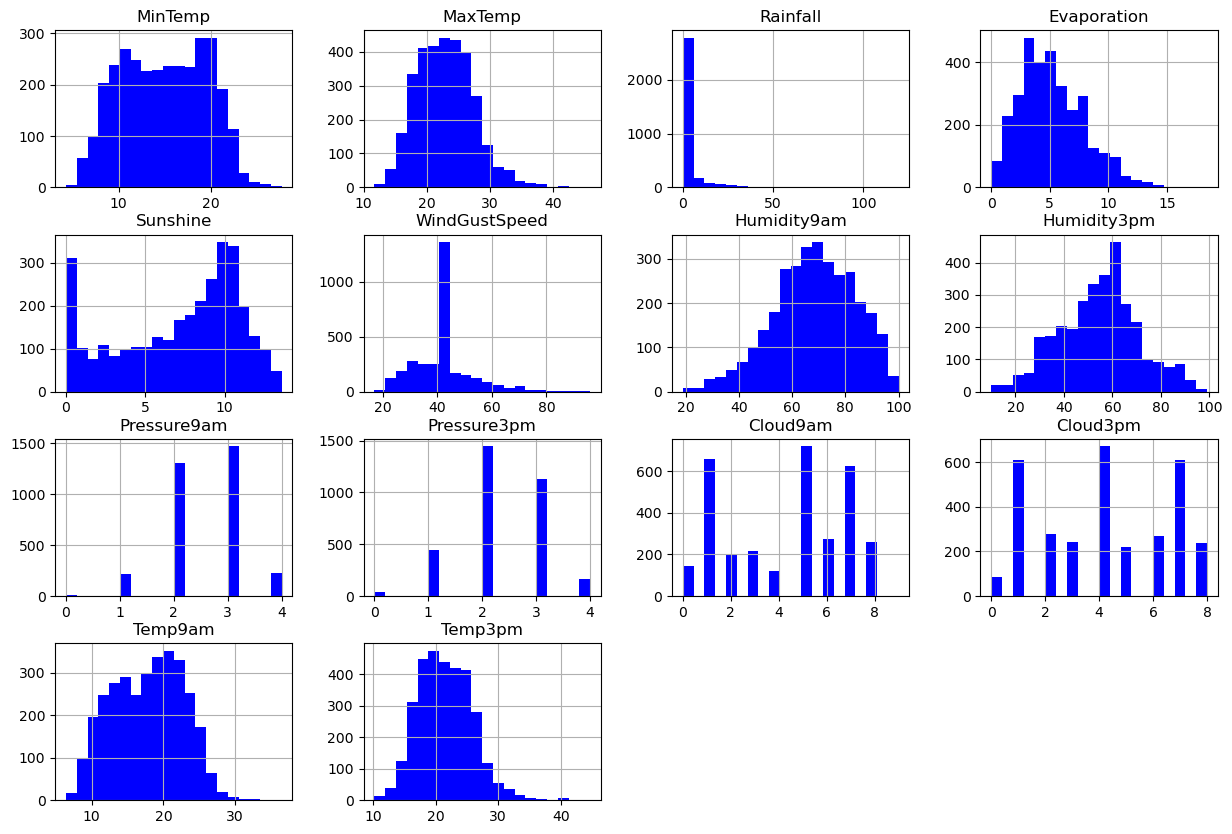

In [249]:
#Plot the numeric columns to get their distribution and choose the ones that are right skewed for the log tranformation
columns.hist(bins=20, color='blue', figsize=(15,10))

In [250]:
def log_transform_right_skewed(df, column):
    skewness = skew(df[column])

    if skewness > 0.4:  # You can adjust this threshold based on your data
        df[column] = np.log1p(df[column])
        print(f'{column} was right-skewed (skewness={skewness}), applied log transformation.')

# Iterate through specified columns and apply log transformation if right-skewed
for column in columns:
        log_transform_right_skewed(df17_sydney_processed, column)


MaxTemp was right-skewed (skewness=0.4916687217649513), applied log transformation.
Rainfall was right-skewed (skewness=5.401160232213828), applied log transformation.
Evaporation was right-skewed (skewness=0.6604903084200522), applied log transformation.
WindGustSpeed was right-skewed (skewness=1.0985692170893668), applied log transformation.
Temp3pm was right-skewed (skewness=0.45369529542937626), applied log transformation.


array([[<Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'Evaporation'}>,
        <Axes: title={'center': 'WindGustSpeed'}>],
       [<Axes: title={'center': 'Temp3pm'}>, <Axes: >]], dtype=object)

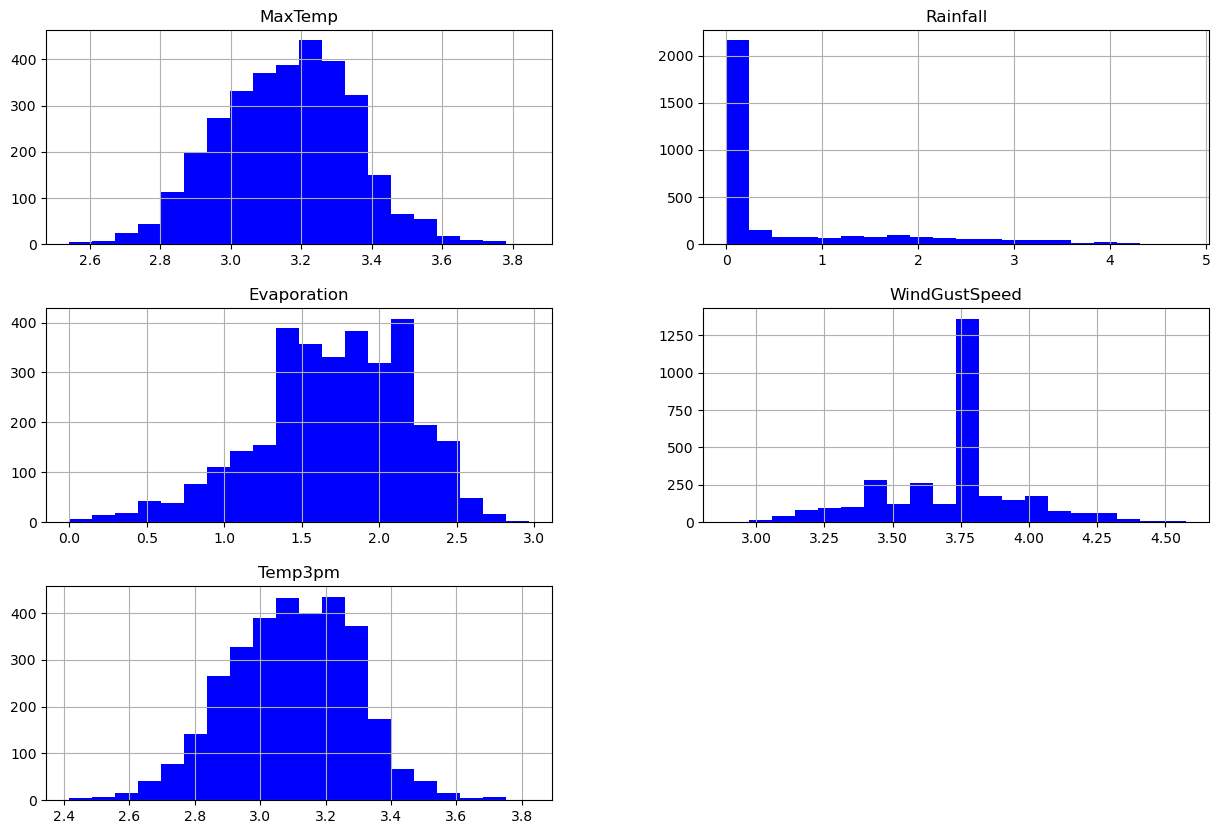

In [251]:
df17_sydney_processed[["MaxTemp","Rainfall","Evaporation","WindGustSpeed","Temp3pm"]].hist(bins=20, color='blue', figsize=(15,10))

In [252]:
df17_sydney_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,19.5,3.152736,2.809403,1.974081,0.0,3.73767,17.0,20.0,92.0,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,19.5,3.280911,1.945910,1.481605,2.7,3.73767,9.0,13.0,83.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.6,3.238678,2.028148,1.223775,0.1,3.73767,17.0,2.0,88.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.7,3.284664,4.361824,1.757858,0.0,3.73767,11.0,6.0,88.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,20.2,3.339322,0.955511,1.280934,8.6,3.73767,9.0,22.0,69.0,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [253]:
features = df17_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df17_sydney_processed['RainTomorrow']

x_train17, x_test17, y_train17, y_test17 = train_test_split(features , Y , test_size=0.2, random_state=10)

print("train set:", x_train17.shape, y_train17.shape)
print("test set:", x_test17.shape, y_train17.shape)

train set: (2573, 66) (2573,)
test set: (644, 66) (2573,)


In [254]:
LR17 = LogisticRegression(solver='liblinear').fit(x_train17, y_train17)
predictions17 = LR17.predict(x_test17)

In [255]:
LR_Accuracy_Score17 = metrics.accuracy_score(y_test17, predictions17)
print("LR Accuracy score is:", LR_Accuracy_Score17)

LR Accuracy score is: 0.8571428571428571


In [256]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score17]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.857143


# Step 18: Power 1:1 transformation Scaling (min-max scaling)

In [257]:
df18_sydney_processed = df13_sydney_processed.copy()

In [258]:
# Select numeric columns for scaling
columns = ["MinTemp","MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "Humidity9am","Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm" ,"Temp9am","Temp3pm"]

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>],
       [<Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>],
       [<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>, <Axes: >, <Axes: >]],
      dtype=object)

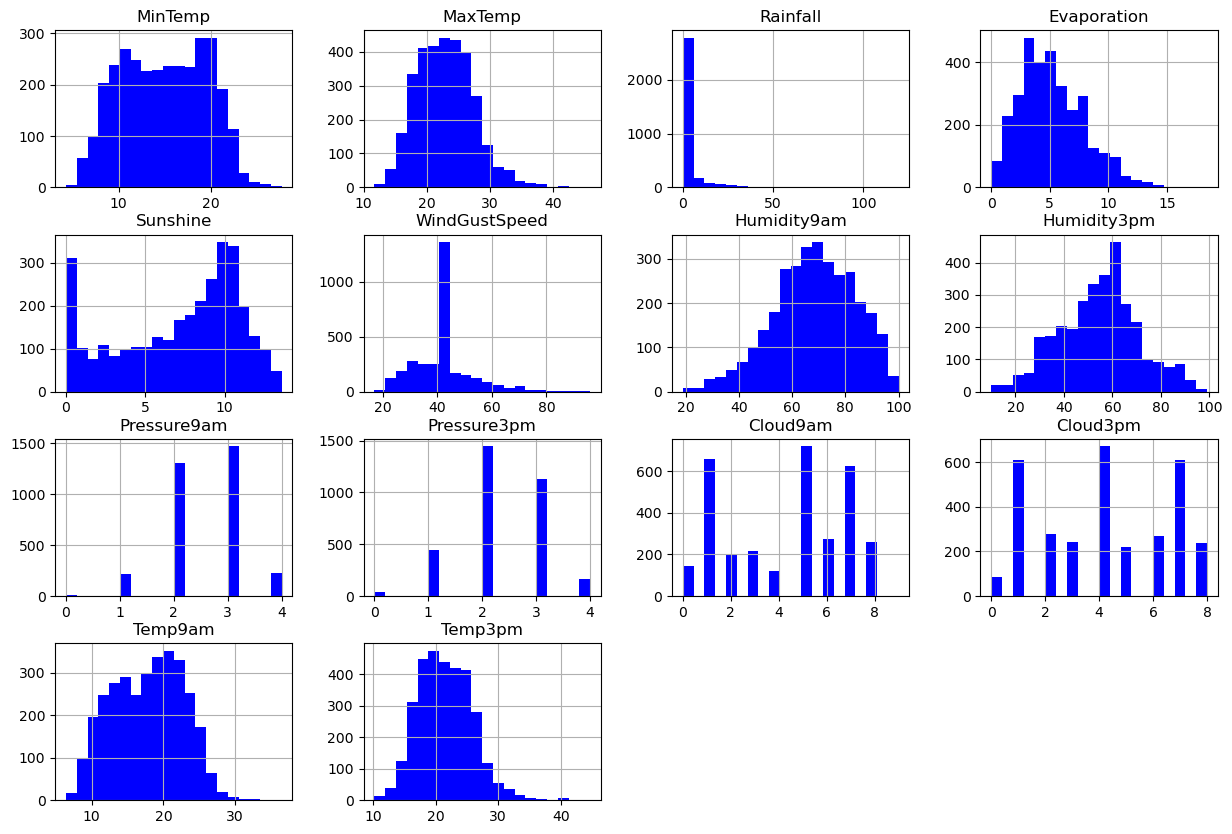

In [259]:
#Plot the columns to visualize original distribution
df18_sydney_processed[columns].hist(bins=20, color='blue', figsize=(15,10))

In [260]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [261]:
df18_sydney_processed[columns] = scaler.fit_transform(df18_sydney_processed[columns])

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>],
       [<Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>],
       [<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>, <Axes: >, <Axes: >]],
      dtype=object)

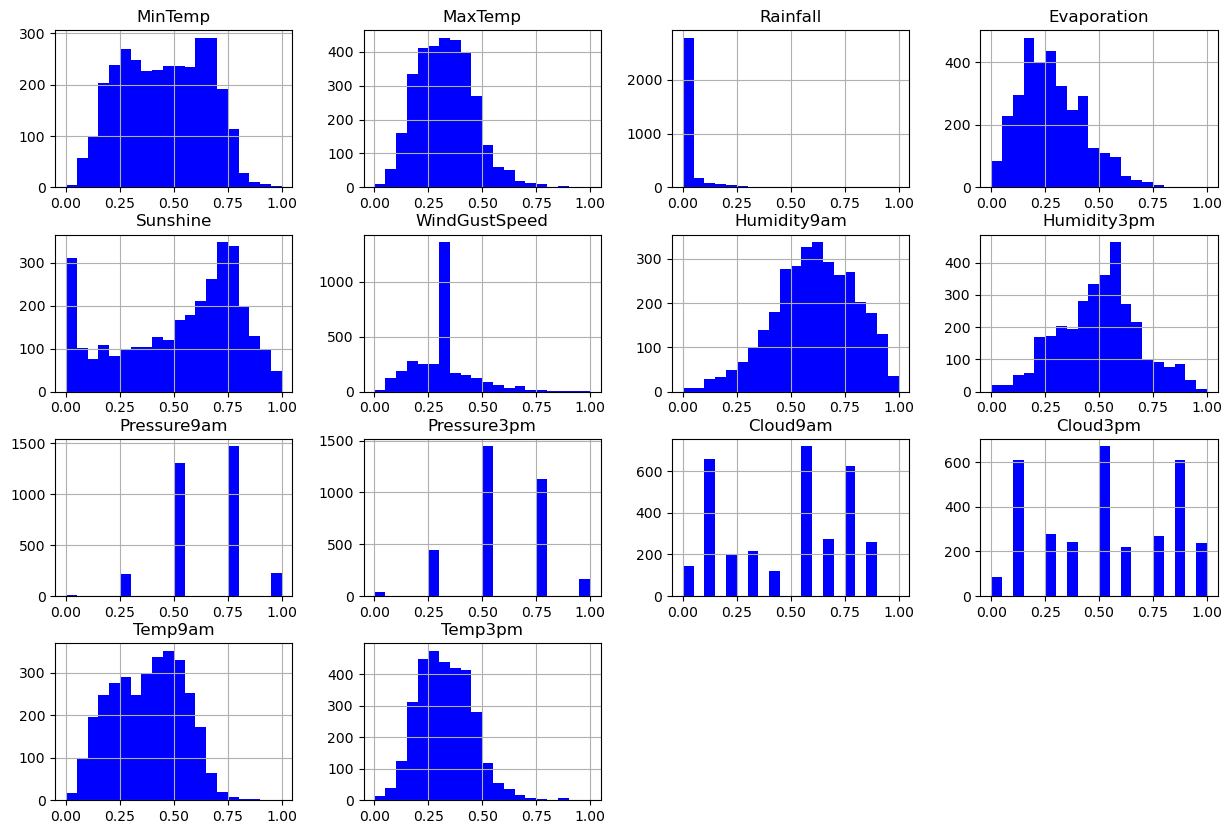

In [262]:
#Plot the columns to visualize the transformed columns
df18_sydney_processed[columns].hist(bins=20, color='blue', figsize=(15,10))

In [263]:
features = df18_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df18_sydney_processed['RainTomorrow']

x_train18, x_test18, y_train18, y_test18 = train_test_split(features , Y , test_size=0.2, random_state=10)

print("train set:", x_train18.shape, y_train18.shape)
print("test set:", x_test18.shape, y_train18.shape)

train set: (2573, 66) (2573,)
test set: (644, 66) (2573,)


In [264]:
LR18 = LogisticRegression(solver='liblinear').fit(x_train18, y_train18)
predictions18 = LR18.predict(x_test18)

In [265]:
LR_Accuracy_Score18 = metrics.accuracy_score(y_test18, predictions18)
print("LR Accuracy score is:", LR_Accuracy_Score18)

LR Accuracy score is: 0.84472049689441


In [266]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score18]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.84472


# Step 19: 1:1 transformation standardization method

In [267]:
df19_sydney_processed = df13_sydney_processed.copy()

In [268]:
# Select numeric columns for scaling
columns = ["MinTemp","MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "Humidity9am","Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm" ,"Temp9am","Temp3pm"]

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>],
       [<Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>],
       [<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>, <Axes: >, <Axes: >]],
      dtype=object)

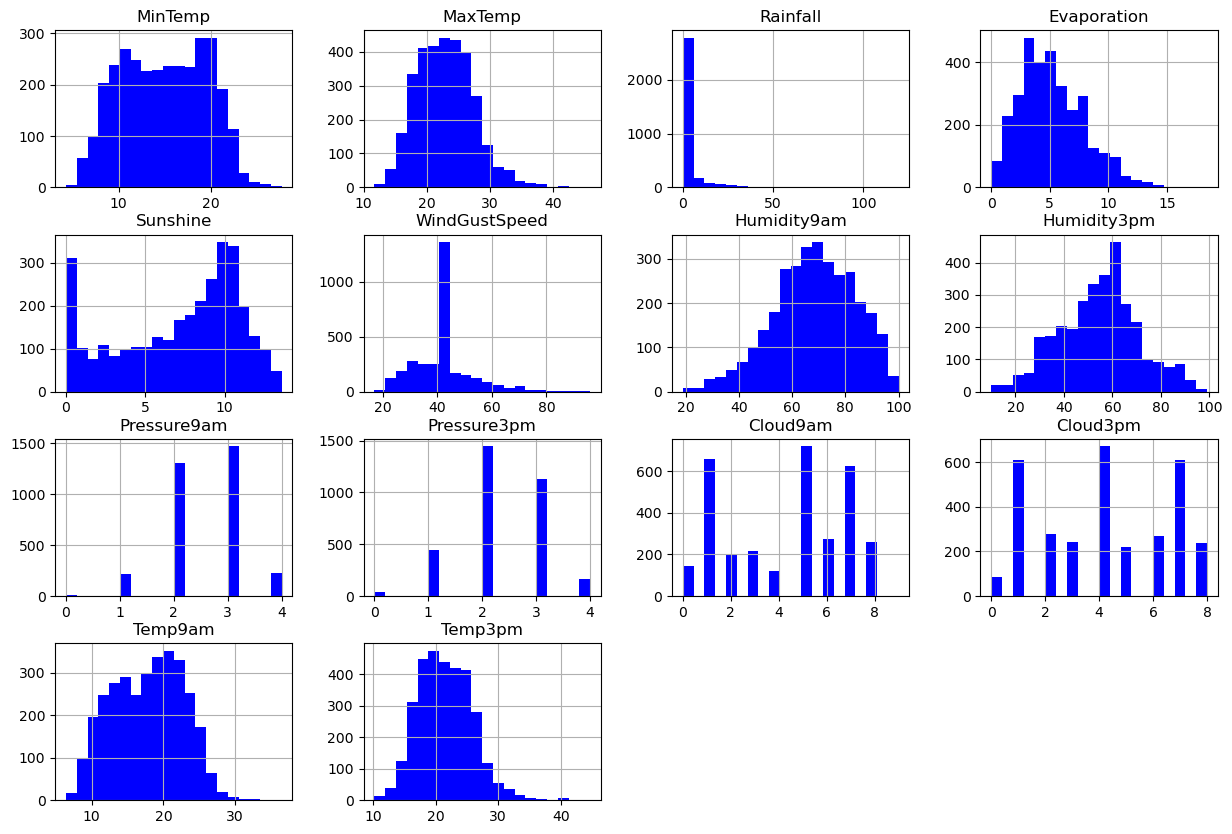

In [269]:
#Plot the columns to visualize the original columns
df19_sydney_processed[columns].hist(bins=20, color='blue', figsize=(15,10))

In [270]:
scaler = StandardScaler()

In [271]:
df19_sydney_processed[columns] = scaler.fit_transform(df19_sydney_processed[columns])

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>],
       [<Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>],
       [<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>, <Axes: >, <Axes: >]],
      dtype=object)

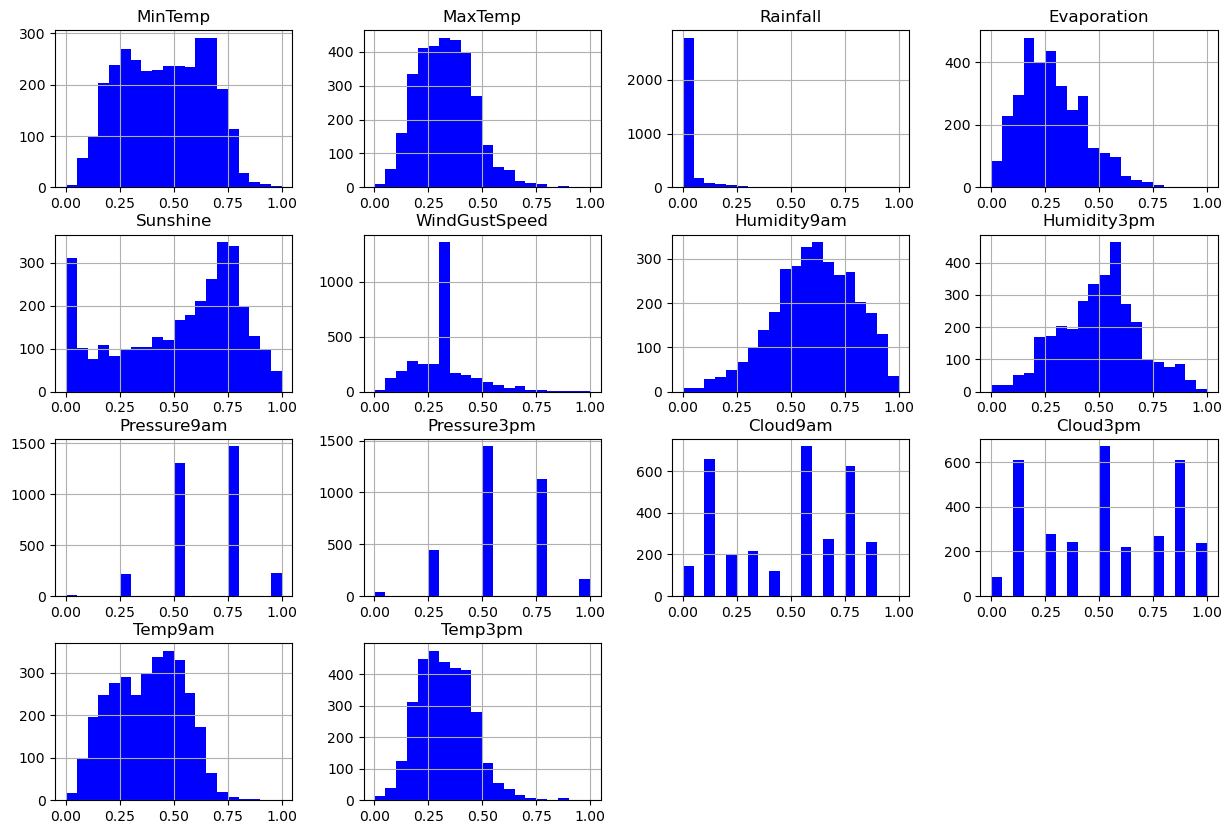

In [272]:
#Plot the columns to visualize the transformed columns
df18_sydney_processed[columns].hist(bins=20, color='blue', figsize=(15,10))

In [273]:
features = df19_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df19_sydney_processed['RainTomorrow']

x_train19, x_test19, y_train19, y_test19 = train_test_split(features , Y , test_size=0.2, random_state=10)

print("train set:", x_train19.shape, y_train19.shape)
print("test set:", x_test19.shape, y_train19.shape)

train set: (2573, 66) (2573,)
test set: (644, 66) (2573,)


In [274]:
LR19 = LogisticRegression(solver='liblinear').fit(x_train19, y_train19)
predictions19 = LR19.predict(x_test19)

In [275]:
LR_Accuracy_Score19 = metrics.accuracy_score(y_test19, predictions19)
print("LR Accuracy score is:", LR_Accuracy_Score19)

LR Accuracy score is: 0.8493788819875776


In [276]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score19]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.849379


# Step 20: 1:1 transformation Frequency Encoding 

In [277]:
# We are going to copy the main dataset for this since the other datasets have already used one-hot encoding method
#but now we want to try frequency encoding method for numinal variables 
#so we use the base form of nominal variables but we concatinate the numeric values that have been already treated 
df20_sydney_processed = df.copy()

##[["WindGustDir","WindDir9am", "WindDir3pm"]]
#df16_sydney_processed_transformed2 = pd.concat([df16_sydney_processed_transformed, df[["Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am",
 #   "WindSpeed3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","RainTomorrow"]]], axis=1)


In [278]:
# Select nominal columns for frequency encoding 
columns = ["WindGustDir","WindDir9am", "WindDir3pm","RainToday"]

In [279]:
for column in columns:
    frequency_map = df20_sydney_processed[column].value_counts(normalize=True).to_dict()
    df20_sydney_processed[column] = df20_sydney_processed[column].map(frequency_map)

In [280]:
df20_sydney_processed[["WindGustDir","WindDir9am", "WindDir3pm","RainToday"]].head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,0.43628,0.047561,0.045122,0.259146
1,0.43628,0.385671,0.199085,0.259146
2,0.43628,0.040854,0.100000,0.259146
3,0.43628,0.027134,0.199085,0.259146
4,0.43628,0.027134,0.060976,0.259146


In [281]:
#Now we replace the numeric values from df13 which has gone through lots of Data preparation techniques
columns_to_replace = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed",
                   "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm",
                   "Temp9am", "Temp3pm"]

In [282]:
df20_sydney_processed[columns_to_replace] = df13_sydney_processed[columns_to_replace]

In [283]:
# We also remove the Date variable as we did before
df20_sydney_processed = df20_sydney_processed.drop(columns="Date")

In [284]:
df20_sydney_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,0.43628,41.0,0.047561,0.045122,17,...,92.0,84.0,2.0,2.0,8.0,8.0,20.7,20.9,0.259146,Yes
1,19.5,25.6,6.0,3.4,2.7,0.43628,41.0,0.385671,0.199085,9,...,83.0,73.0,2.0,2.0,7.0,7.0,22.4,24.8,0.259146,Yes
2,21.6,24.5,6.6,2.4,0.1,0.43628,41.0,0.040854,0.100000,17,...,88.0,86.0,2.0,2.0,7.0,8.0,23.5,23.0,0.259146,Yes
3,NaN,NaN,NaN,NaN,NaN,0.43628,NaN,0.027134,0.199085,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259146,Yes
4,19.7,25.7,77.4,4.8,0.0,0.43628,41.0,0.027134,0.060976,11,...,88.0,74.0,2.0,1.0,8.0,8.0,22.5,25.5,0.259146,Yes


In [285]:
#To check if the replacing of columns creates a null value so we treat that missing data instance 
df20_sydney_processed.isnull().sum()

MinTemp          63
MaxTemp          63
Rainfall         63
Evaporation      63
Sunshine         63
WindGustDir       0
WindGustSpeed    63
WindDir9am        0
WindDir3pm        0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am      63
Humidity3pm      63
Pressure9am      63
Pressure3pm      63
Cloud9am         63
Cloud3pm         63
Temp9am          63
Temp3pm          63
RainToday         0
RainTomorrow      0
dtype: int64

In [286]:
df20_sydney_processed = df20_sydney_processed.dropna()

In [287]:
features = df20_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df20_sydney_processed['RainTomorrow']

x_train20, x_test20, y_train20, y_test20 = train_test_split(features , Y , test_size=0.2, random_state=10)

print("train set:", x_train20.shape, y_train20.shape)
print("test set:", x_test20.shape, y_train20.shape)

train set: (2573, 20) (2573,)
test set: (644, 20) (2573,)


In [288]:
LR20 = LogisticRegression(solver='liblinear').fit(x_train20, y_train20)
predictions20 = LR20.predict(x_test20)

In [289]:
LR_Accuracy_Score20 = metrics.accuracy_score(y_test20, predictions20)
print("LR Accuracy score is:", LR_Accuracy_Score20)

LR Accuracy score is: 0.860248447204969


In [290]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score20]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.860248


# Step 21: 1:Many transformation Hashing

In [291]:
df21_sydney_processed = df.copy()

In [292]:
# Select nominal columns for frequency encoding 
columns = ["WindGustDir","WindDir9am", "WindDir3pm","RainToday"]

In [293]:
mapping_dict = {}
for column in columns:
    mapping_dict[column] = dict(zip(df21_sydney_processed[column].unique(), range(df21_sydney_processed[column].nunique())))


In [294]:
for column in columns:
    df21_sydney_processed[column] = df21_sydney_processed[column].map(mapping_dict[column])


In [295]:
df21_sydney_processed[columns].head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,0,0,0,0
1,0,1,1,0
2,0,2,2,0
3,0,3,1,0
4,0,3,3,0


In [296]:
columns_to_replace = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed",
                   "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm",
                   "Temp9am", "Temp3pm"]

In [297]:
df21_sydney_processed[columns_to_replace] = df13_sydney_processed[columns_to_replace]

In [298]:
# We also remove the Date variable as we did before
df21_sydney_processed = df21_sydney_processed.drop(columns="Date")
df21_sydney_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,0,41.0,0,0,17,...,92.0,84.0,2.0,2.0,8.0,8.0,20.7,20.9,0,Yes
1,19.5,25.6,6.0,3.4,2.7,0,41.0,1,1,9,...,83.0,73.0,2.0,2.0,7.0,7.0,22.4,24.8,0,Yes
2,21.6,24.5,6.6,2.4,0.1,0,41.0,2,2,17,...,88.0,86.0,2.0,2.0,7.0,8.0,23.5,23.0,0,Yes
3,NaN,NaN,NaN,NaN,NaN,0,NaN,3,1,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Yes
4,19.7,25.7,77.4,4.8,0.0,0,41.0,3,3,11,...,88.0,74.0,2.0,1.0,8.0,8.0,22.5,25.5,0,Yes


In [299]:
#To check if the replacing of columns creates a null value so we treat that missing data instance 
df21_sydney_processed.isnull().sum()

MinTemp          63
MaxTemp          63
Rainfall         63
Evaporation      63
Sunshine         63
WindGustDir       0
WindGustSpeed    63
WindDir9am        0
WindDir3pm        0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am      63
Humidity3pm      63
Pressure9am      63
Pressure3pm      63
Cloud9am         63
Cloud3pm         63
Temp9am          63
Temp3pm          63
RainToday         0
RainTomorrow      0
dtype: int64

In [300]:
df21_sydney_processed = df21_sydney_processed.dropna()

In [301]:
features = df21_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df21_sydney_processed['RainTomorrow']

x_train21, x_test21, y_train21, y_test21 = train_test_split(features , Y , test_size=0.2, random_state=10)

print("train set:", x_train21.shape, y_train21.shape)
print("test set:", x_test21.shape, y_train21.shape)

train set: (2573, 20) (2573,)
test set: (644, 20) (2573,)


In [302]:
LR21 = LogisticRegression(solver='liblinear').fit(x_train21, y_train21)
predictions21 = LR21.predict(x_test21)

In [303]:
LR_Accuracy_Score21 = metrics.accuracy_score(y_test21, predictions21)
print("LR Accuracy score is:", LR_Accuracy_Score21)

LR Accuracy score is: 0.8524844720496895


In [304]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score21]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.852484


# Step 22: 1:Many transformation - Encoding of  Interval/Ratio Variable 

In [305]:
df22_sydney_processed = df20_sydney_processed.copy()

In [306]:
variables_to_encode = ["Pressure9am", "Pressure3pm"]

In [307]:
for variable in variables_to_encode: 
    num_bins = 5
    df22_sydney_processed[variable] = pd.cut(df22_sydney_processed[variable], bins=num_bins, labels=False)

In [308]:
df22_sydney_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,0.43628,41.0,0.047561,0.045122,17,...,92.0,84.0,2,2,8.0,8.0,20.7,20.9,0.259146,Yes
1,19.5,25.6,6.0,3.4,2.7,0.43628,41.0,0.385671,0.199085,9,...,83.0,73.0,2,2,7.0,7.0,22.4,24.8,0.259146,Yes
2,21.6,24.5,6.6,2.4,0.1,0.43628,41.0,0.040854,0.100000,17,...,88.0,86.0,2,2,7.0,8.0,23.5,23.0,0.259146,Yes
4,19.7,25.7,77.4,4.8,0.0,0.43628,41.0,0.027134,0.060976,11,...,88.0,74.0,2,1,8.0,8.0,22.5,25.5,0.259146,Yes
5,20.2,27.2,1.6,2.6,8.6,0.43628,41.0,0.385671,0.107622,9,...,69.0,62.0,1,0,6.0,6.0,23.8,26.0,0.259146,Yes


In [309]:
df22_sydney_processed = pd.get_dummies(df22_sydney_processed, columns=[variable for variable in variables_to_encode], prefix=variables_to_encode)

In [310]:
df22_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [311]:
df22_sydney_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am_0,Pressure9am_1,Pressure9am_2,Pressure9am_3,Pressure9am_4,Pressure3pm_0,Pressure3pm_1,Pressure3pm_2,Pressure3pm_3,Pressure3pm_4
0,19.5,22.4,15.6,6.2,0.0,0.43628,41.0,0.047561,0.045122,17,...,False,False,True,False,False,False,False,True,False,False
1,19.5,25.6,6.0,3.4,2.7,0.43628,41.0,0.385671,0.199085,9,...,False,False,True,False,False,False,False,True,False,False
2,21.6,24.5,6.6,2.4,0.1,0.43628,41.0,0.040854,0.100000,17,...,False,False,True,False,False,False,False,True,False,False
4,19.7,25.7,77.4,4.8,0.0,0.43628,41.0,0.027134,0.060976,11,...,False,False,True,False,False,False,True,False,False,False
5,20.2,27.2,1.6,2.6,8.6,0.43628,41.0,0.385671,0.107622,9,...,False,True,False,False,False,True,False,False,False,False


In [312]:
features = df22_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df22_sydney_processed['RainTomorrow']

x_train22, x_test22, y_train22, y_test22 = train_test_split(features , Y , test_size=0.2, random_state=10)

print("train set:", x_train22.shape, y_train22.shape)
print("test set:", x_test22.shape, y_train22.shape)

train set: (2573, 28) (2573,)
test set: (644, 28) (2573,)


In [313]:
LR22 = LogisticRegression(solver='liblinear').fit(x_train22, y_train22)
predictions22 = LR22.predict(x_test22)

In [314]:
LR_Accuracy_Score22 = metrics.accuracy_score(y_test22, predictions22)
print("LR Accuracy score is:", LR_Accuracy_Score22)

LR Accuracy score is: 0.8524844720496895


In [315]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score22]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.852484


# Step 23: Many:Many transformation - PCA 

In [316]:
df23_sydney_processed = df20_sydney_processed.copy()

In [317]:
features = df23_sydney_processed[["MinTemp","MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "Humidity9am","Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm" ,"Temp9am","Temp3pm"]]

In [318]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(features)

In [319]:
n_components = 3 
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_standardized)

In [320]:
columns_pca = [f'PCA_{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data_pca, columns=columns_pca)

In [321]:
df23_sydney_processed = pd.concat([df23_sydney_processed, df_pca], axis=1)

In [322]:
df23_sydney_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,PCA_1,PCA_2,PCA_3
0,19.5,22.4,15.6,6.2,0.0,0.43628,41.0,0.047561,0.045122,17.0,...,2.0,8.0,8.0,20.7,20.9,0.259146,Yes,-0.442504,4.081729,0.445369
1,19.5,25.6,6.0,3.4,2.7,0.43628,41.0,0.385671,0.199085,9.0,...,2.0,7.0,7.0,22.4,24.8,0.259146,Yes,0.543452,2.890145,-0.130628
2,21.6,24.5,6.6,2.4,0.1,0.43628,41.0,0.040854,0.100000,17.0,...,2.0,7.0,8.0,23.5,23.0,0.259146,Yes,0.055521,3.920172,-0.123828
4,19.7,25.7,77.4,4.8,0.0,0.43628,41.0,0.027134,0.060976,11.0,...,1.0,8.0,8.0,22.5,25.5,0.259146,Yes,2.622228,1.601354,1.369688
5,20.2,27.2,1.6,2.6,8.6,0.43628,41.0,0.385671,0.107622,9.0,...,0.0,6.0,6.0,23.8,26.0,0.259146,Yes,1.442310,2.214079,1.188056


In [323]:
#To check if the power transformation creates a null value so we treat that missing data instance 
df23_sydney_processed.isnull().sum()

MinTemp          62
MaxTemp          62
Rainfall         62
Evaporation      62
Sunshine         62
WindGustDir      62
WindGustSpeed    62
WindDir9am       62
WindDir3pm       62
WindSpeed9am     62
WindSpeed3pm     62
Humidity9am      62
Humidity3pm      62
Pressure9am      62
Pressure3pm      62
Cloud9am         62
Cloud3pm         62
Temp9am          62
Temp3pm          62
RainToday        62
RainTomorrow     62
PCA_1            62
PCA_2            62
PCA_3            62
dtype: int64

In [324]:
df23_sydney_processed = df23_sydney_processed.dropna()

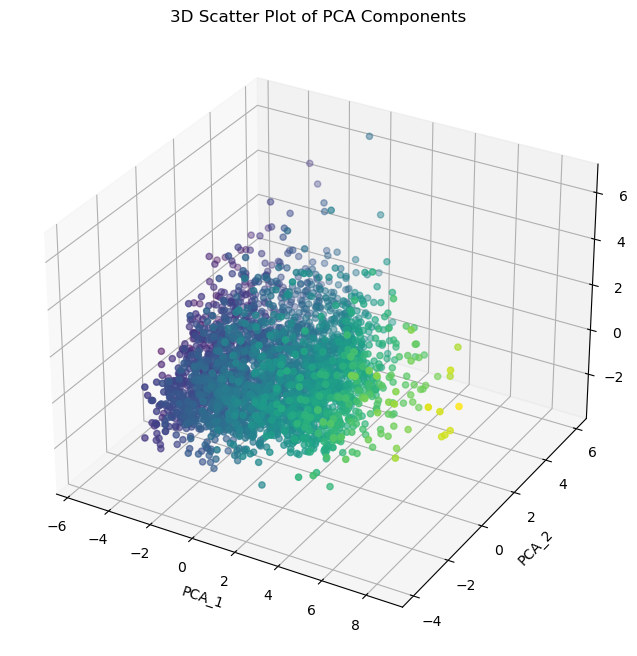

In [325]:
# Vizualize the PCA values 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df23_sydney_processed['PCA_1'], df23_sydney_processed['PCA_2'], df23_sydney_processed['PCA_3'], c=df23_sydney_processed['PCA_1'], cmap='viridis', marker='o')

ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')

plt.title('3D Scatter Plot of PCA Components')
plt.show()

In [326]:
PCA_Components = df23_sydney_processed[['PCA_1','PCA_2','PCA_3']]

Y = df23_sydney_processed['RainTomorrow']

x_train23, x_test23, y_train23, y_test23 = train_test_split(PCA_Components, Y , test_size=0.2, random_state=10)

print("train set:", x_train23.shape, y_train23.shape)
print("test set:", x_test23.shape, y_train23.shape)

train set: (2524, 3) (2524,)
test set: (631, 3) (2524,)


In [327]:
LR23 = LogisticRegression(solver='liblinear').fit(x_train23, y_train23)
predictions23 = LR23.predict(x_test23)

In [328]:
LR_Accuracy_Score23 = metrics.accuracy_score(y_test23, predictions23)
print("LR Accuracy score is:", LR_Accuracy_Score23)

LR Accuracy score is: 0.7654516640253566


In [329]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score23]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.765452


# Step 24: Many:Many transformation - Isomap 

In [330]:
df24_sydney_processed = df20_sydney_processed.copy()

In [331]:
features = df24_sydney_processed[["MinTemp","MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "Humidity9am","Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm" ,"Temp9am","Temp3pm"]]

In [332]:
components = 2 

In [333]:
isomap = Isomap(n_components=components)
df_transformed = isomap.fit_transform(features)

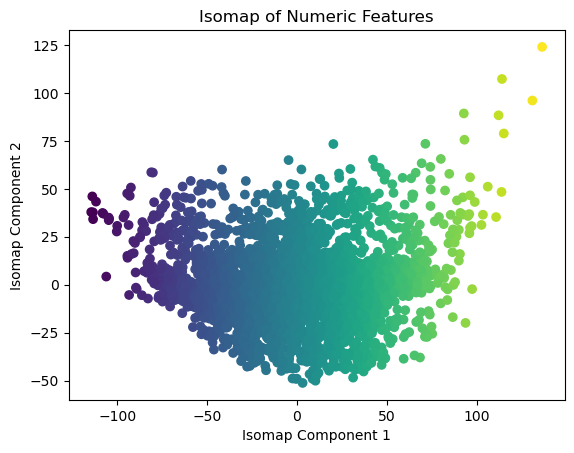

In [334]:
plt.scatter(df_transformed[:, 0], df_transformed[:, 1], c=df_transformed[:, 0], cmap='viridis')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('Isomap of Numeric Features')
plt.show()

In [335]:
df24_sydney_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,0.43628,41.0,0.047561,0.045122,17,...,92.0,84.0,2.0,2.0,8.0,8.0,20.7,20.9,0.259146,Yes
1,19.5,25.6,6.0,3.4,2.7,0.43628,41.0,0.385671,0.199085,9,...,83.0,73.0,2.0,2.0,7.0,7.0,22.4,24.8,0.259146,Yes
2,21.6,24.5,6.6,2.4,0.1,0.43628,41.0,0.040854,0.100000,17,...,88.0,86.0,2.0,2.0,7.0,8.0,23.5,23.0,0.259146,Yes
4,19.7,25.7,77.4,4.8,0.0,0.43628,41.0,0.027134,0.060976,11,...,88.0,74.0,2.0,1.0,8.0,8.0,22.5,25.5,0.259146,Yes
5,20.2,27.2,1.6,2.6,8.6,0.43628,41.0,0.385671,0.107622,9,...,69.0,62.0,1.0,0.0,6.0,6.0,23.8,26.0,0.259146,Yes


In [336]:
Y = df24_sydney_processed['RainTomorrow']

x_train24, x_test24, y_train24, y_test24 = train_test_split(df_transformed , Y , test_size=0.2, random_state=10)

print("train set:", x_train24.shape, y_train24.shape)
print("test set:", x_test24.shape, y_train24.shape)

train set: (2573, 2) (2573,)
test set: (644, 2) (2573,)


In [337]:
LR24 = LogisticRegression(solver='liblinear').fit(x_train24, y_train24)
predictions24 = LR24.predict(x_test24)

In [338]:
LR_Accuracy_Score24 = metrics.accuracy_score(y_test24, predictions24)
print("LR Accuracy score is:", LR_Accuracy_Score24)

LR Accuracy score is: 0.8322981366459627


In [339]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score24]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.832298


# Step 25: Feature Selection - Sequential Backward Selection (SBS) 

In [340]:
df25_sydney_processed = df20_sydney_processed.copy()

In [341]:
x = df25_sydney_processed.drop(columns=['RainTomorrow'])
y = df25_sydney_processed['RainTomorrow']

In [342]:
x_train25, x_test25, y_train25, y_test25 = train_test_split(x, y, test_size=0.2, random_state=10)

In [343]:
base_model = LogisticRegression(solver='liblinear')

In [344]:
sbs = SequentialFeatureSelector(base_model,
                                 k_features='best', 
                                 forward=False, 
                                 scoring='accuracy',
                                 cv=5)

In [345]:
sbs.fit(x_train25, y_train25)

SequentialFeatureSelector(estimator=LogisticRegression(solver='liblinear'),
                          forward=False, k_features=(1, 20),
                          scoring='accuracy')

In [346]:
selected_features = list(sbs.k_feature_idx_)
print(selected_features)

[0, 1, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19]


In [347]:
selected_feature_names = x.columns[list(selected_features)]

print("Selected Features:", selected_feature_names)

Selected Features: Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed3pm',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')


In [348]:
selected_x_train = x_train25[selected_feature_names]
selected_x_test = x_test25[selected_feature_names]

In [349]:
model_with_selected_features = LogisticRegression(solver='liblinear')
model_with_selected_features.fit(selected_x_train, y_train25)

LogisticRegression(solver='liblinear')

In [350]:
predictions25 = model_with_selected_features.predict(selected_x_test)

In [351]:
LR_Accuracy_Score25 = metrics.accuracy_score(y_test25, predictions25)
print("LR Accuracy score is:", LR_Accuracy_Score25)

LR Accuracy score is: 0.8586956521739131


In [352]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score25]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.858696


# Step 26: Feature Selection - Sequential Forward Selection (SFS) 

In [353]:
df26_sydney_processed = df20_sydney_processed.copy()

In [354]:
x = df26_sydney_processed.drop(columns=['RainTomorrow'])
y = df26_sydney_processed['RainTomorrow']

In [355]:
x_train26, x_test26, y_train26, y_test26 = train_test_split(x, y, test_size=0.2, random_state=10)

In [356]:
base_model = LogisticRegression(solver='liblinear')

In [357]:
sfs = SequentialFeatureSelector(base_model,
                                 k_features='best', 
                                 forward=True, 
                                 scoring='accuracy',
                                 cv=5)

In [358]:
sfs.fit(x_train26, y_train26)

SequentialFeatureSelector(estimator=LogisticRegression(solver='liblinear'),
                          k_features=(1, 20), scoring='accuracy')

In [359]:
selected_features = sfs.k_feature_idx_
print(selected_features)

(0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 15, 16, 17, 19)


In [360]:
selected_feature_names = x.columns[list(selected_features)]

print("Selected Features:", selected_feature_names)

Selected Features: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'RainToday'],
      dtype='object')


In [361]:
selected_x_train = x_train26[selected_feature_names]
selected_x_test = x_test26[selected_feature_names]

In [362]:
model_with_selected_features = LogisticRegression(solver='liblinear')
model_with_selected_features.fit(selected_x_train, y_train26)


LogisticRegression(solver='liblinear')

In [363]:
predictions26 = model_with_selected_features.predict(selected_x_test)

In [364]:
LR_Accuracy_Score26 = metrics.accuracy_score(y_test26, predictions26)
print("LR Accuracy score is:", LR_Accuracy_Score26)

LR Accuracy score is: 0.8540372670807453


In [365]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score26]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.854037


# Step 27: Feature Selection - Bidirectional Generation 

In [366]:
df27_sydney_processed = df20_sydney_processed.copy()

In [367]:
x = df27_sydney_processed.drop(columns=['RainTomorrow'])
y = df27_sydney_processed['RainTomorrow']

In [368]:
x_train27, x_test27, y_train27, y_test27 = train_test_split(x, y, test_size=0.2, random_state=10)

In [369]:
base_model = LogisticRegression(solver='liblinear')

In [370]:
bg = SequentialFeatureSelector(base_model,
                                 forward=True, 
                                 floating=True, 
                                 k_features='best',  
                                 scoring='accuracy',  
                                 cv=5)  

In [371]:
bg.fit(x_train27, y_train27)

SequentialFeatureSelector(estimator=LogisticRegression(solver='liblinear'),
                          floating=True, k_features=(1, 20),
                          scoring='accuracy')

In [372]:
selected_features = bg.k_feature_idx_
print(selected_features)

(3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18)


In [373]:
selected_feature_names = x.columns[list(selected_features)]

print("Selected Features:", selected_feature_names)

Selected Features: Index(['Evaporation', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm'],
      dtype='object')


In [374]:
selected_x_train = x_train27[selected_feature_names]
selected_x_test = x_test27[selected_feature_names]

In [375]:
model_with_selected_features = LogisticRegression(solver='liblinear')
model_with_selected_features.fit(selected_x_train, y_train27)

LogisticRegression(solver='liblinear')

In [376]:
predictions27 = model_with_selected_features.predict(selected_x_test)

In [377]:
LR_Accuracy_Score27 = metrics.accuracy_score(y_test27, predictions27)
print("LR Accuracy score is:", LR_Accuracy_Score27)

LR Accuracy score is: 0.8291925465838509


In [378]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression']})

Report['Accuracy Score'] = [LR_Accuracy_Score27]

Report

,Algorithm,Accuracy Score
0,LogisticRegression,0.829193


# Table of data prepration techniques and its impact 

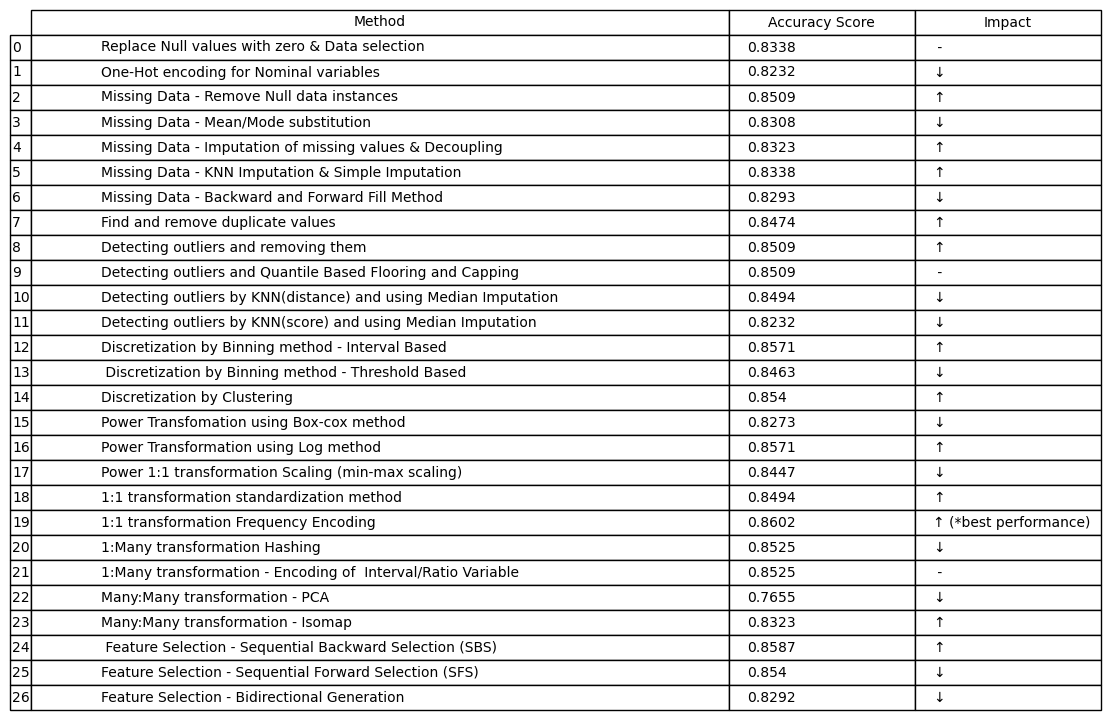

In [379]:
data = {
    'Method': ['Replace Null values with zero & Data selection', 'One-Hot encoding for Nominal variables', 'Missing Data - Remove Null data instances', 'Missing Data - Mean/Mode substitution', 'Missing Data - Imputation of missing values & Decoupling', 'Missing Data - KNN Imputation & Simple Imputation', 
              'Missing Data - Backward and Forward Fill Method', 'Find and remove duplicate values', 'Detecting outliers and removing them', 'Detecting outliers and Quantile Based Flooring and Capping', 'Detecting outliers by KNN(distance) and using Median Imputation', 'Detecting outliers by KNN(score) and using Median Imputation', 
              'Discretization by Binning method - Interval Based', ' Discretization by Binning method - Threshold Based', 'Discretization by Clustering', 'Power Transfomation using Box-cox method', 'Power Transformation using Log method', 'Power 1:1 transformation Scaling (min-max scaling)', '1:1 transformation standardization method', '1:1 transformation Frequency Encoding' , 
              '1:Many transformation Hashing', '1:Many transformation - Encoding of  Interval/Ratio Variable', 'Many:Many transformation - PCA', 'Many:Many transformation - Isomap', ' Feature Selection - Sequential Backward Selection (SBS)', 'Feature Selection - Sequential Forward Selection (SFS)', 'Feature Selection - Bidirectional Generation' ],
    'Accuracy Score': [round(LR_Accuracy_Score1, 4), round(LR_Accuracy_Score2, 4), round(LR_Accuracy_Score3, 4), round(LR_Accuracy_Score4, 4), round(LR_Accuracy_Score5, 4), round(LR_Accuracy_Score6, 4), round(LR_Accuracy_Score7, 4), round(LR_Accuracy_Score8, 4), round(LR_Accuracy_Score9, 4), round(LR_Accuracy_Score10, 4), 
                      round(LR_Accuracy_Score11, 4), round(LR_Accuracy_Score2, 4), round(LR_Accuracy_Score13, 4), round(LR_Accuracy_Score14, 4), round(LR_Accuracy_Score15, 4), round(LR_Accuracy_Score16, 4), round(LR_Accuracy_Score17, 4), round(LR_Accuracy_Score18, 4), round(LR_Accuracy_Score19, 4) , round(LR_Accuracy_Score20, 4), 
                       round(LR_Accuracy_Score21, 4), round(LR_Accuracy_Score22, 4), round(LR_Accuracy_Score23, 4), round(LR_Accuracy_Score24, 4)
                     , round(LR_Accuracy_Score25, 4), round(LR_Accuracy_Score26, 4), round(LR_Accuracy_Score27, 4),                      
                      ],
    'Impact': [' - ', '↓', '↑' , '↓', '↑', '↑', '↓', '↑', '↑', ' - ', '↓', '↓', '↑', '↓', '↑', '↓', '↑', '↓', '↑',
                 '↑ (*best performance)', '↓', ' - ', '↓', '↑', '↑', '↓', '↓'
                 ]
    
}

# Creating a DataFrame
report_df = pd.DataFrame(data)


# Plotting the table
fig, ax = plt.subplots(figsize=(8, 3)) 
ax.axis('off') 
tbl = table(ax, report_df, loc='center', colWidths=[0.75, 0.2, 0.2])

# Styling the table
tbl.auto_set_font_size(False) 
tbl.set_fontsize(10)
tbl.scale(1.5, 1.5)

for i, key in enumerate(tbl.get_celld().keys()):
    cell = tbl[key]
    if key[0] != 0:  
        cell.set_text_props(ha='left')

plt.show()

# Conclusion and interesting points: 

My model improved from 0.8338 to 0.8602.
Furthermore, the intresting thing in my project was that my model performed better on nominal encoding using frequency better than one-hot encoding method.Also, some outlier treatments couldn't treat all the outliers and some of them remained even after the treatment.    